In [1]:
# Make Jupyter wider
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:95% !important;}</style>"))

## Uncomment these 2 lines in order to display any variables (dfs) that are on their own line, but in the same input cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
# path = "/home/damian/miniconda3/envs/rise_latest/etc/jupyter/nbconfig"
path = "C:\\Users\\Devin\\Anaconda2\\etc\\jupyter\\nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'width': 1280,
              'height': 1024,
                'theme': 'none'
    });

**Tonight's event: Tuesday Nerd Talk (TNT):**  
Tuesday Nerd Talks is a series of informal talks on a variety of topics, given by members of the local community. Talks start at 7 pm on the first and third Tuesdays of each month and are free to attend.  
<br>
Please check our Facebook page for live music, special bottle releases, and other events or check out: **[powderkegbrewingcompany.com/events](powderkegbrewingcompany.com/events)**

**Upcoming talks:**  
**Mar 7:** Amy Lewis -- Global wildlife conservation  
**Mar 21:** Jeff Blumenfeld -- "Get Sponsored: A Funding Guide for Explorers, Adventurers and Would Be World Travelers”  
**Apr 4:** Roger Linfield -- Shocking science "Discoveries" that proved to be wrong  
**Apr 18:** Johnny Waldman -- TBD  
**May 9:** Ed Friedman -- Chaos & the Mandelbrot set  

# Side Projects<br><br>
### Devin Rourke<br>
### Tuesday Nerd Talk @ Powder Keg Brewing Company<br>
### February 21st, 2017<br><br>
##### (a presentation written with Python + Markdown + Jupyter Notebook and displayed with reveal.js)

**side-project:** (expr.) something that you are doing aside from your main objective or job.<br><br>
*Example:* "I have a lot of side-projects going on right now. It feels like I am always in the middle of something.”<br><br>
*Example:* “In my opinion, it is very important to have side-projects. Doing something aside from my main focus helps me to relax and not take everything so seriously.”

## Famous side projects (there's a lot)  

**Post-it notes:** In 1968, a scientist at 3M, Dr. Spencer Silver, was attempting to develop a super-strong adhesive. His colleague, Art Fry, used the adhesive to anchor his bookmark in his hymnbook. 11 years later, the rollout of "Post-Its" began. The original notes' yellow color was chosen by accident, as the lab next-door to the Post-It team had only yellow scrap paper to use. [[wikipedia]](https://en.wikipedia.org/wiki/Post-it_note)
<img  src="fry.jpg" width="30%"/>

**Powder Keg Brewing Company:**  
"a group of friends shared a 10 gal home-brewing kit" + "they are nerds" = good beer
<img  src="earlypkbc.jpg" width="75%"/>

**Gmail:** 
“I had this idea I wanted to build web-based email. I worked on it for a couple of weeks and then got bored. One of the lessons I learned from that was just in terms of my own psychology, that it was important that I always have a working product. The first thing I do on day one is build something useful, then just keep improving it.”  
-Paul Buchheit, creator and lead developer of Gmail. [[time]](http://time.com/43263/gmail-10th-anniversary/)
<img src="gmailroots.jpg" width="50%"/>

<img  src="caution.png" width="25%"/>
<center><br><br>
<font size="8">The 20% rule, or the 120% rule?</font>
</center>

<center>    
<img src="sideprojects.PNG" width="100%">
</center>

<center>
<img src="time.png" width="100%">
</center>

In [ ]:
import antigravity

<center>
<img src="https://imgs.xkcd.com/comics/python.png" width="55%">
</center>

<center>
<img src="xkcd.png" width="70%">
</center>

# My side project:<br>
## Python  
## Data  
## Running  


# Part 1: Get Data<br>
## Webscraping

In [26]:
from selenium import webdriver
import html5lib, lxml
import numpy as np
import pandas as pd 
import datetime
import time
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import plotly as py
py.offline.init_notebook_mode()

<center>
<img src="table.png" width="100%">
</center>

<center>
<img src="url.png" width="100%">
</center>

**50** athletes / page  
**20** pages / state  
**51** states (+ DC)  
**17** years (2000 – 2016)  
**7** events (_XC_: 5000m; _Track_: 100m, 200m, 400m, 800m, 1600m, 3200m)  
**2** genders

* * *
## = 12,138,000 data points

#### Construct URL(s)

In [ ]:
state = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL",
         "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
         "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
         "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
         "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
gender = ['Boys', 'Girls']
year = ['2000','2001','2002','2003','2004','2005','2006','2007',
        '2008','2009','2010','2011','2012','2013','2014','2015','2016']
page = ['1','2','3','4','5','6','7','8','9','10',
        '11','12','13','14','15','16','17','18','19','20']

login_url = 'https://accounts.milesplit.com/login?'
url = "http://" + state[0] + ".milesplit.com/rankings/events/" + 
        "high-school-" + gender[0] + "/cross-country/5000m?year=" 
            + year[0] + "&page=" + page[0]

init_url = login_url + 'next=' + url
driver = webdriver.Chrome()            
driver.get(init_url)

#### Log In

In [ ]:
username = driver.find_element_by_name("username")
password = driver.find_element_by_name("password")
username.send_keys("XXXXXX")
password.send_keys("XXXXXX")
time.sleep(3)                # explicit wait, until javascript finishes
driver.find_element_by_xpath("btn-continue").click()
time.sleep(3)

#### Harvest and parse the data, while looping through each URL

In [ ]:
for ge in gender:
    for st in state:
        for yr in year:
            for pg in page:
                url = "http://" + st + ".milesplit.com/rankings/events/" + 
                    "high-school-" + ge + "/cross-country/5000m?year=" + 
                    yr + "&page=" + pg
                driver.get(url)
                time.sleep(1)    # increase this to pretend I'm not a robot
                content = driver.page_source  # this returns the raw HTML

<center>
<img src="rawhtml.PNG" width="100%">
</center>

#### Find shortcuts

In [ ]:
                if "<table" not in content: 
                    df_page = []
                    table_flag = 0
                    print "No results this year."
                    break

In [ ]:
                else: 
                    table_flag = 1
                    if "pagination" not in content:
                        print "Last page of results for this year"
                        dfs.append(page_df(yr, st, ge))
                        break

In [ ]:
    else:
        teststring = "Page " + str(pg) + " of "
        page_of = content.find(teststring) 
        num_pages = int(content[
                page_of+len(teststring):page_of+len(teststring)+2])    
        if num_pages < 20:
            print "Woohoo! Shortcut.."
            pg = str(num_pages + 1)  #request page one greater than listed...
            url = "http://" + st + ".milesplit.com/rankings/events/" + 
                "high-school-" + ge + "/cross-country/5000m?year=" + yr +
                "&page=" + str(pg)
            driver.get(url)
            content = driver.page_source
            time.sleep(3)                          
            dfs.append(page_df(yr, st, ge))
            break
            else:
                dfs.append(page_df(yr, st, ge))
                print "MOAR DATA!"

#### Parse HTML into a Pandas dataframe

In [ ]:
def page_df(yr, st, ge):
        df_page = pd.read_html(content)[0]
        df_page['Year'] = yr            # append Year column
        df_page['State'] = st           # append State column
        df_page['Gender'] = ge          # append Gender column
        return (df_page)

#### Clean up the data and export to .csv

In [ ]:
df = pd.concat(dfs, ignore_index=True)  

df.columns = ['Rank', 'Time','Athlete/School','Grade','Meet',
              'Year','State','Gender']
df['Time'] = df['Time'].fillna(0).astype(str)   
df['Time'] = df['Time'].str.split(':').apply(
    lambda x: int(x[0]) * 60 + float(x[1][0:4]))
df['Grade'] = df['Grade'].fillna(0).astype(int)              
df['Year'] = df['Year'].fillna(0).astype(int)

df.to_csv('5K.csv', encoding='utf-8')

#### Read in .csv files

In [40]:
# Read in .csv files

dfL = pd.read_csv('5K.csv')
dfR = pd.read_csv('elevation.csv', names = ['State', 'Elevation'])

df = pd.merge(dfL, dfR, on='State')

df_size = os.path.getsize('5K.csv')
print df_size

109792334


#### Learn about the data

In [14]:
df.head(3)

Rank    Time                Athlete/School  Grade  \
0     1   959.9  Tyler Stanfield  Homewood HS   2002   
1     2  1077.4  Scott Fuqua  Oak Mountain HS   2002   
2     1  1032.3        Robert Bedsole  Hoover   2005   

                                                Meet  Year State Gender  \
0       Foot Locker Nationals 2001  26th Dec 8, 2001  2001    AL   Boys   
1       Foot Locker Nationals 2001  32nd Dec 8, 2001  2001    AL   Boys   
2  USATF National Junior Olympic XC Championships...  2002    AL   Boys   

   Elevation  
0      500.0  
1      500.0  
2      500.0

In [15]:
df.tail()

Rank    Time                                    Athlete/School  Grade  \
948586   440  2284.0         Maggie Henderson  Star Valley High School   2020   
948587   441  2314.0  Samantha Portenier  Cheyenne Central High School   2019   
948588   442  2326.3                 Caylin Deniz  Worland High School   2020   
948589   443  2384.9                 Cailyn Deniz  Worland High School      0   
948590   444  2432.0                   Liz Bixler  Rawlins High School   2018   

                                                     Meet  Year State Gender  \
948586  Wyoming 3A West Conference Championships  73rd...  2016    WY  Girls   
948587  Liberty Bell Cross Country Invitational  122nd...  2016    WY  Girls   
948588                  Worland Invite  68th Sep 22, 2016  2016    WY  Girls   
948589             Cody Fox and Hounds  32nd Sep 16, 2016  2016    WY  Girls   
948590  Kelly Walsh Bear Trap Cross Country Race  80th...  2016    WY  Girls   

        Elevation  
948586     6700.0  
948587     6700.0  
948588     6700.0  
948589     6700.0  
948590     6700.0

In [16]:
print len(df.index)

948591


In [35]:
boys = df.groupby('Gender').get_group('Boys')
girls = df.groupby('Gender').get_group('Girls')
print str(len(boys)) + ' boy records since 2000'
print str(len(girls)) + ' girl records since 2000'

526350 boy records since 2000
422241 girl records since 2000


In [18]:
print df.dtypes

Rank                int64
Time              float64
Athlete/School     object
Grade               int64
Meet               object
Year                int64
State              object
Gender             object
Elevation         float64
dtype: object


# Part 2: Plot Stuff

# But First...

<center>
<img src="beer.png" width="20%">
</center>
  
  
## What's your side project?  <br>
  
    
#### and when are you giving a TNT about it? (tell Adam)

# Part 2: Plot Stuff

In [32]:
df.head(1)

Rank   Time                Athlete/School  Grade  \
0     1  959.9  Tyler Stanfield  Homewood HS   2002   

                                           Meet  Year State Gender  Elevation  
0  Foot Locker Nationals 2001  26th Dec 8, 2001  2001    AL   Boys      500.0

In [19]:
athlete_school = df['Athlete/School'].str.split(expand = True)
athlete_school.columns = ['First_Name' , 'Next_Name' , 'C' , 'D' , 'E' , 'F' , 'G' , 'H', 'I', 'J' , 'K']
athlete_school.head(3)

First_Name  Next_Name         C         D     E     F     G     H     I  \
0      Tyler  Stanfield  Homewood        HS  None  None  None  None  None   
1      Scott      Fuqua       Oak  Mountain    HS  None  None  None  None   
2     Robert    Bedsole    Hoover      None  None  None  None  None  None   

      J     K  
0  None  None  
1  None  None  
2  None  None

In [21]:
# athlete_school.First_Name.describe()
athlete_school[['First_Name','Next_Name']];

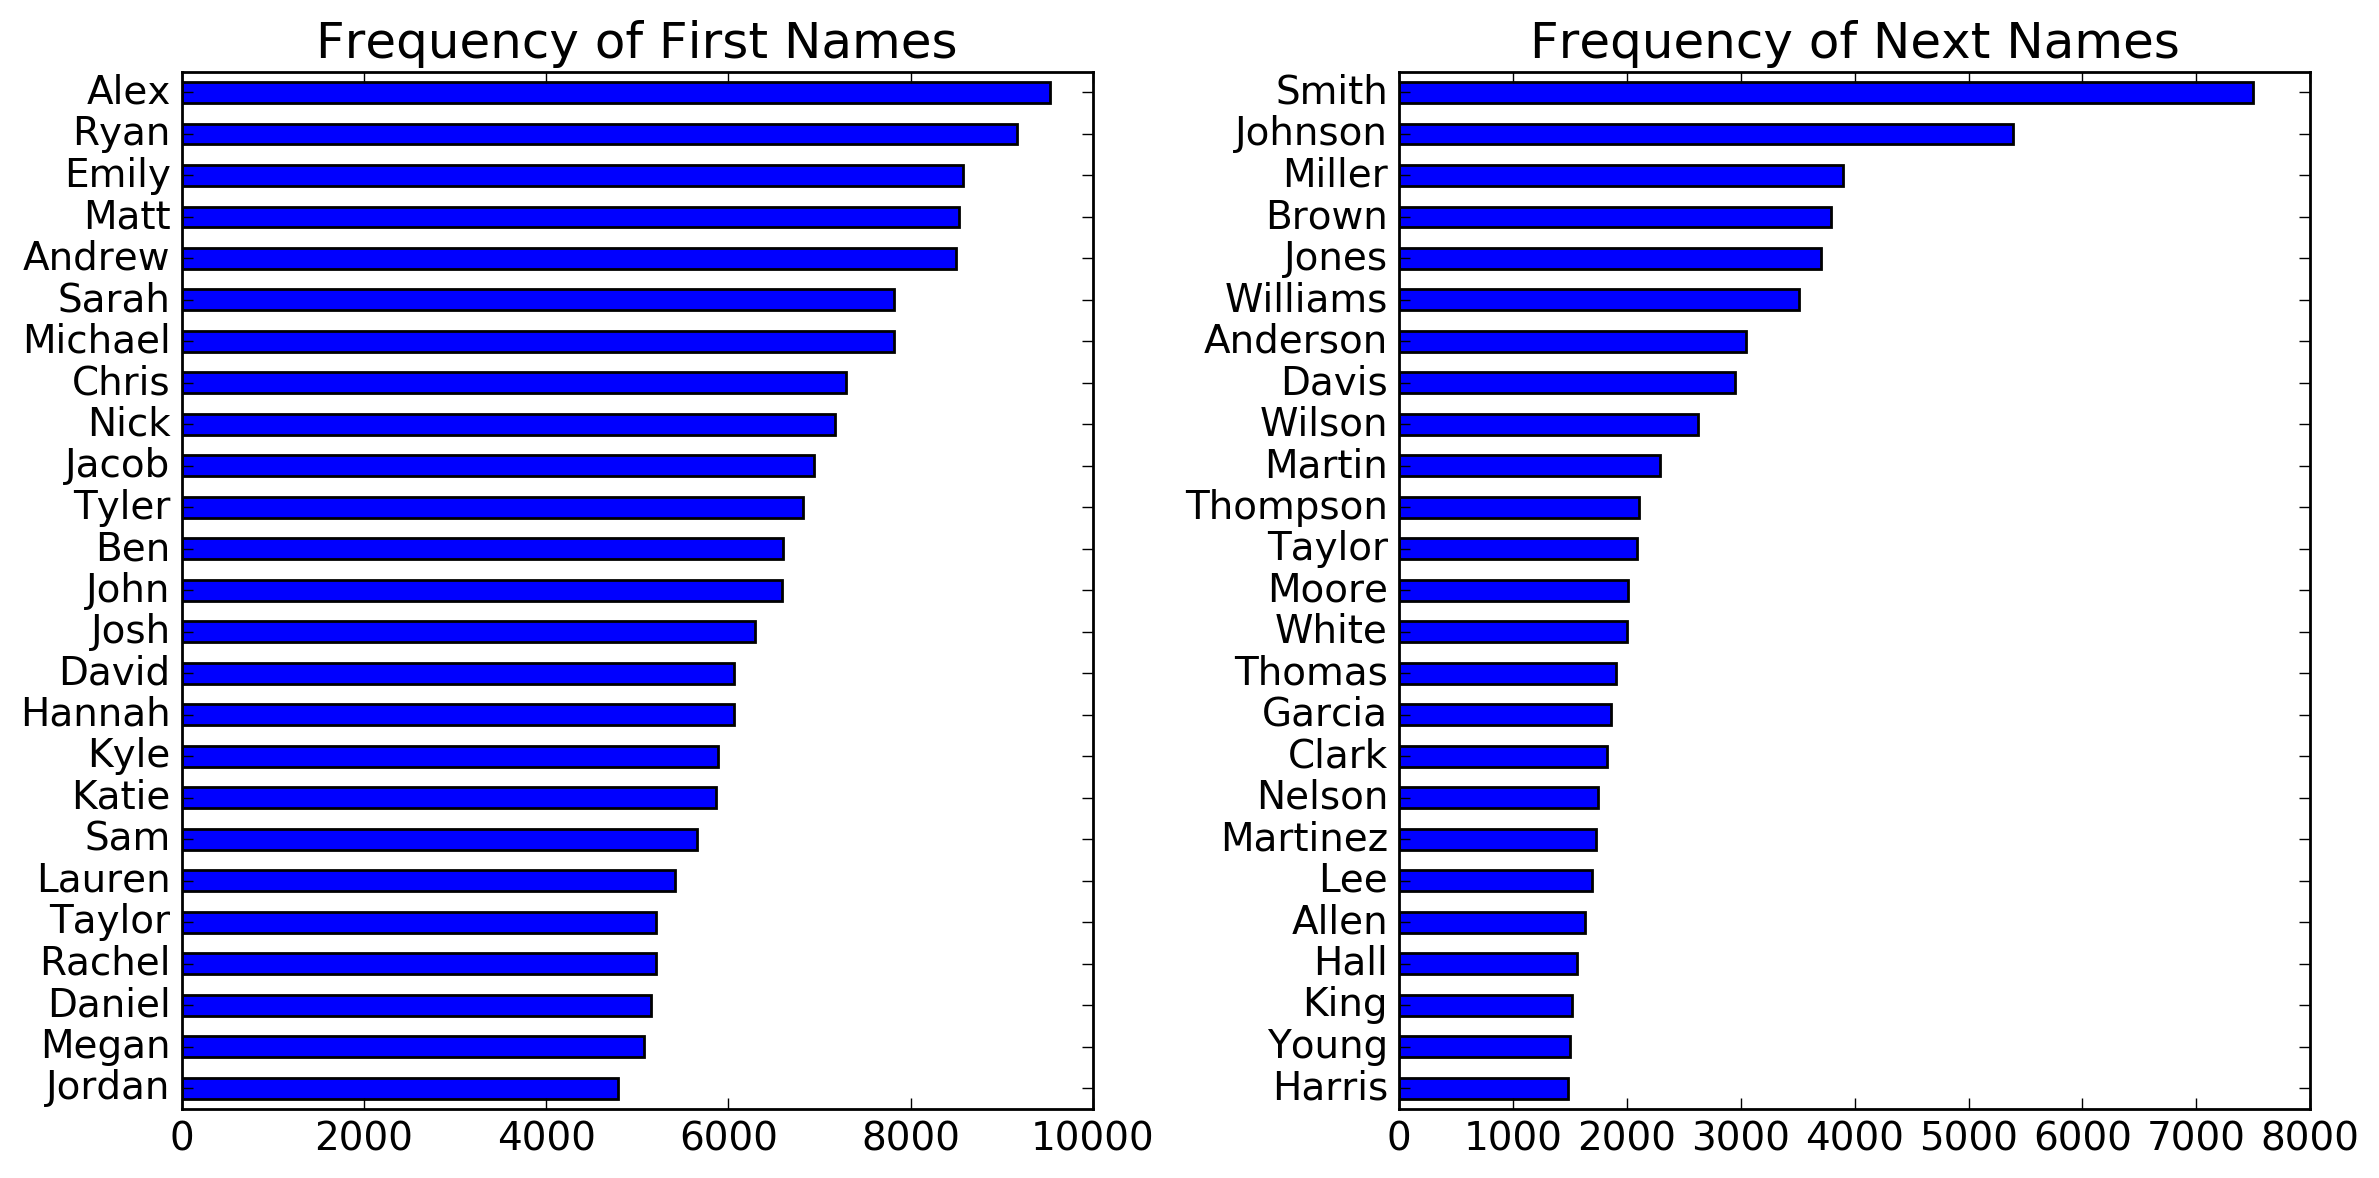

In [22]:
plt.subplot(1, 2, 1)
athlete_school.First_Name.value_counts().head(25).plot.barh(fontsize = 14, figsize=(12,6))
ax1 = plt.gca()
ax1.invert_yaxis()
plt.title('Frequency of First Names', fontsize = 18)

plt.subplot(1, 2, 2)
athlete_school.Next_Name.value_counts().head(25).plot.barh(fontsize = 14,  figsize=(12,6))
ax2 = plt.gca()
ax2.invert_yaxis()
plt.title('Frequency of Next Names', fontsize = 18)

plt.tight_layout()
plt.show()

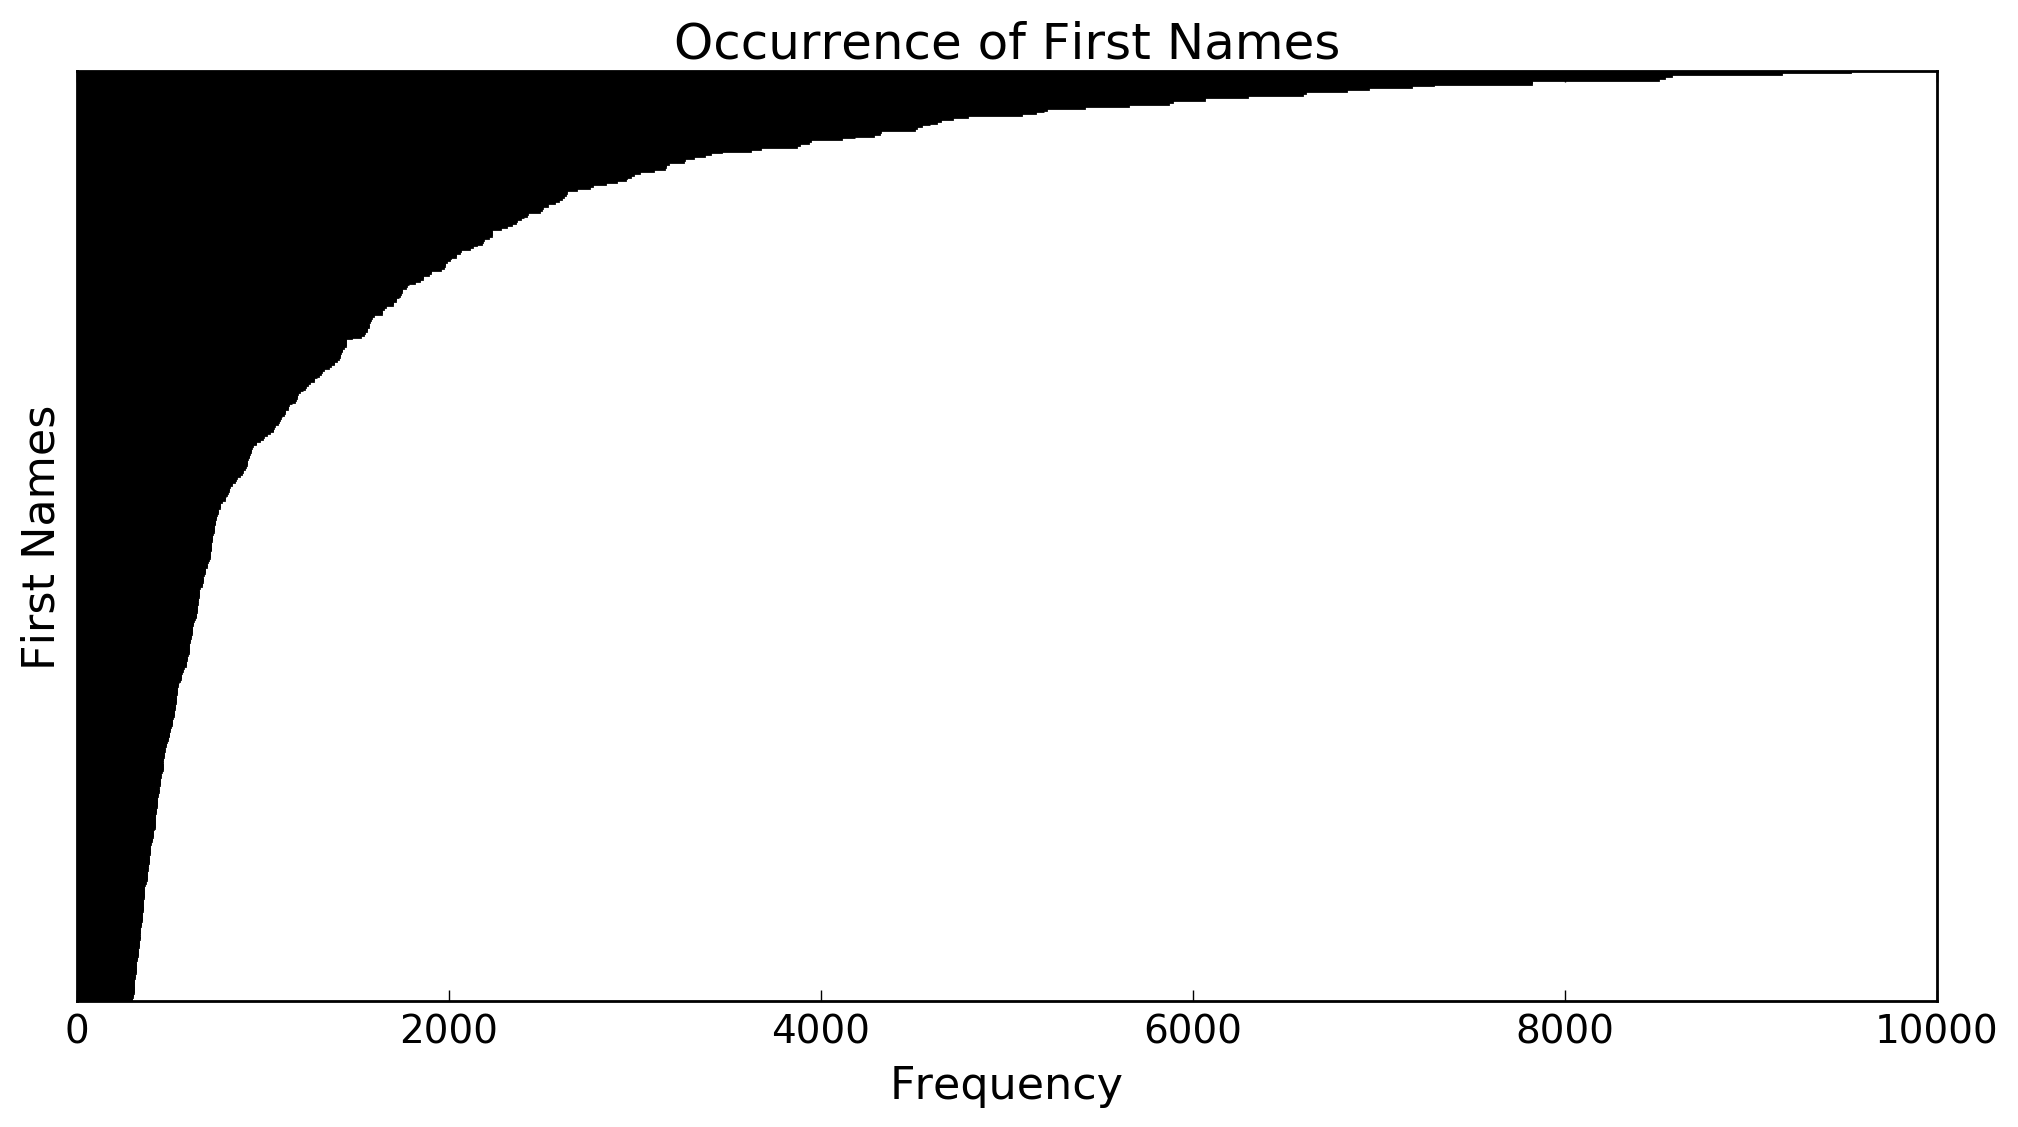

In [39]:
plt.figure(figsize=(12,6))
athlete_school.First_Name.value_counts().head(500).plot.barh(fontsize = 14)
ax = plt.gca()
ax.invert_yaxis()
plt.yticks([])
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('First Names', fontsize=16)
plt.title('Occurrence of First Names',fontsize=18)
plt.show()

In [48]:
devins = sorted(athlete_school.loc[
        athlete_school['First_Name'] == 'Devin','Next_Name'].unique())
len(devins)

621

In [29]:
def timeTicks(x, pos):
    d = datetime.timedelta(seconds = x)
    return str(d)[2:7]                                                                             
formatter = mpl.ticker.FuncFormatter(timeTicks)

In [49]:
## Fastest boys times run since 2000
boys.sort_values('Time').head(20)

Rank   Time                                     Athlete/School  Grade  \
418739     1  850.4                        Dathan Ritzenhein  Rockford   2001   
570173     1  858.7               Edward Cheserek  St. Benedict's Prep   2013   
569173     1  860.0               Edward Cheserek  St. Benedict's Prep   2013   
867606     1  860.8                      Andrew Hunter  Loudoun Valley   2016   
78805      1  864.0       German Fernandez  Riverbank High School (SJ)   2008   
36452      1  867.2                 Bernie Montoya  Cibola High School   2013   
864589     1  868.0                            Sean McGorty  Chantilly   2013   
888984     1  871.7         Tanner Anderson  North Central High School   2015   
798976     1  872.2               Brodey Hasty  BrentwoodH High School   2018   
755672     1  872.4               David Principe Jr.  La Salle Academy   2017   
86792      1  872.5            Phillip Rocha  Arcadia High School (SS)   2016   
834704     1  872.5                             Conner Mantz  Sky View   2015   
715918     1  872.7                              Matthew Maton  Summit   2015   
814836     1  874.0                                 Craig Lutz  Marcus   2011   
811398     1  874.1                  Scott MacPherson  Plano Senior HS   2005   
270612     1  875.0                 Curtis Eckstein  Oldenburg Academy   2017   
82787      1  876.0            Bryan Guijarro  Knight High School (SS)   2012   
795976     1  876.0             Aaron Templeton  Hardin Valley Academy   2014   
866600     1  876.0                      Andrew Hunter  Loudoun Valley   2016   
265611     1  876.2  Futsum Zienasellassie  North Central High Scho...   2012   

                                                     Meet  Year State Gender  \
418739      MHSAA State Championships LP  1st Nov 4, 2000  2000    MI   Boys   
570173       Essex County Championships  1st Oct 26, 2012  2012    NJ   Boys   
569173       Essex County Championships  1st Oct 28, 2011  2011    NJ   Boys   
867606        Third Battle Invitational  1st Oct 17, 2015  2015    VA   Boys   
78805   CIF State Cross Country Championships  1st Nov...  2007    CA   Boys   
36452              Division 1 Section 1  1st Oct 26, 2012  2012    AZ   Boys   
864589       Foot Locker South Regional  1st Nov 24, 2012  2012    VA   Boys   
888984           WIAA State Championship  1st Nov 8, 2014  2014    WA   Boys   
798976  Great American Cross Country Festival  1st Sep...  2016    TN   Boys   
755672  Great American Cross Country Festival  2nd Sep...  2016    RI   Boys   
86792             Stanford Invitational  1st Sep 26, 2015  2015    CA   Boys   
834704   Utah Region 5 XC Championships  1st Oct 16, 2013  2013    UT   Boys   
715918  George Fox Cross Country Classic  1st Oct 12, ...  2013    OR   Boys   
814836       Foot Locker South Regional  1st Nov 28, 2009  2009    TX   Boys   
811398     Texas X-C State Championship  1st Nov 13, 2004  2004    TX   Boys   
270612  IHSAA Cross Country Semi-State 2 - Shelbyville...  2016    IN   Boys   
82787               Golden League Finals  1st Nov 3, 2011  2011    CA   Boys   
795976       Foot Locker South Regional  1st Nov 30, 2013  2013    TN   Boys   
866600       Foot Locker South Regional  1st Nov 29, 2014  2014    VA   Boys   
265611           Flashrock Invitational  1st Sep 17, 2011  2011    IN   Boys   

        Elevation  
418739      900.0  
570173      250.0  
569173      250.0  
867606      950.0  
78805      2900.0  
36452      4100.0  
864589      950.0  
888984     1700.0  
798976      900.0  
755672      200.0  
86792      2900.0  
834704     6100.0  
715918     3300.0  
814836     1700.0  
811398     1700.0  
270612      700.0  
82787      2900.0  
795976      900.0  
866600      950.0  
265611      700.0

In [18]:
df.iloc[boys.Time.idxmin()]

Rank                                                          1
Time                                                      850.4
Athlete/School                      Dathan Ritzenhein  Rockford
Grade                                                      2001
Meet              MHSAA State Championships LP  1st Nov 4, 2000
Year                                                       2000
State                                                        MI
Gender                                                     Boys
Elevation                                                   900
Name: 418739, dtype: object

<p style="float: left; font-size: 18pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="ritzhs.jpg" style="width: 100%"><br>HS 2000 14:10</p>
<p style="float: left; font-size: 18pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="ritzcu.jpg" style="width: 100%"><br>Colorado 2002 13:27</p>
<p style="float: left; font-size: 18pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="ritzpro.jpg" style="width: 100%"><br>American Record 2009 12:56</p>

In [50]:
## Fastest girls times run since 2000
girls.sort_values('Time').head(20)

Rank    Time                                 Athlete/School  Grade  \
89606      1   984.1          Amber Trotter  Ukiah High School (NC)   2002   
656670     1   987.0                  Ryen Frazier  Unattached (NC)   2015   
876766     1   989.0              Weini Kelati  Heritage (Leesburg)   2016   
899409     1   991.1     Amy-Eloise Neale  Glacier Peak High School   2013   
96443      1   992.0            Nikki Hiltz  Aptos High School (CC)   2013   
102456     1   992.1  Fiona O'Keeffe  Davis Senior High School (SJ)   2016   
900409     1   995.0             Alexa Efraimson  Camas High School   2015   
657671     1   996.1                  Nevada Mareno  Leesville Road   2017   
28896      1  1000.0     Allie Ostrander  Kenai Central High School   2015   
101451     1  1000.0  Fiona O'Keeffe  Davis Senior High School (SJ)   2016   
99449      1  1000.0            Sarah Baxter  Simi Valley High (SS)   2014   
827842     1  1000.5                   Devin Clark  Smithson Valley   2015   
626312     1  1000.9                        Aisling Cuffe  Cornwall   2011   
48880      1  1002.9       Danielle Jones  Desert Vista High School   2015   
100450     1  1003.0            Sarah Baxter  Simi Valley High (SS)   2014   
128892     1  1004.0             Brie Oakley  Grandview High School   2017   
103459     1  1005.0          Claudia Lane  Malibu High School (SS)   2019   
125892     1  1005.0                Elise Cranny  Niwot High School   2014   
632315     1  1005.4           Katherine Lee  Shoreham-Wading River   2018   
312425     1  1005.7               Cailie Logue  Girard High School   2017   

                                                     Meet  Year State Gender  \
89606         Foot Locker Nationals 2001  1st Dec 8, 2001  2001    CA  Girls   
656670       Foot Locker South Regional  1st Nov 29, 2014  2014    NC  Girls   
876766        Third Battle Invitational  1st Oct 17, 2015  2015    VA  Girls   
899409           Sundodger Invitational  1st Sep 15, 2012  2012    WA  Girls   
96443   CIF California Cross Country State Meet  106th...  2009    CA  Girls   
102456            Stanford Invitational  1st Sep 26, 2015  2015    CA  Girls   
900409       Bill Dellinger Invitational  1st Oct 5, 2013  2013    WA  Girls   
657671    CAP 8 Conference Championship  1st Oct 20, 2015  2015    NC  Girls   
28896                Palmer Invitational  1st Sep 6, 2014  2014    AK  Girls   
101451            Stanford Invitational  1st Sep 27, 2014  2014    CA  Girls   
99449   CIF California State Cross Country Championshi...  2012    CA  Girls   
827842             UIL 6A - District 25  1st Oct 21, 2014  2014    TX  Girls   
626312  Great American Cross Country Festival  1st Oct...  2010    NY  Girls   
48880        Desert Twilight XC Festival  2nd Oct 3, 2014  2014    AZ  Girls   
100450  CIF California State Cross Country Championshi...  2013    CA  Girls   
128892  Liberty Bell Cross Country Invitational  1st S...  2016    CO  Girls   
103459  CIF State Cross Country Championships  1st Nov...  2016    CA  Girls   
125892  Northern Conference Championship  1st Oct 5, 2013  2013    CO  Girls   
632315     Brown Northeast Invitational  1st Oct 15, 2016  2016    NY  Girls   
312425              Baldwin Invitational  1st Oct 1, 2016  2016    KS  Girls   

        Elevation  
89606      2900.0  
656670      700.0  
876766      950.0  
899409     1700.0  
96443      2900.0  
102456     2900.0  
900409     1700.0  
657671      700.0  
28896      1900.0  
101451     2900.0  
99449      2900.0  
827842     1700.0  
626312     1000.0  
48880      4100.0  
100450     2900.0  
128892     6800.0  
103459     2900.0  
125892     6800.0  
632315     1000.0  
312425     2000.0

In [21]:
df.iloc[girls.Time.idxmin()]

Rank                                                        1
Time                                                    984.1
Athlete/School          Amber Trotter  Ukiah High School (NC)
Grade                                                    2002
Meet              Foot Locker Nationals 2001  1st Dec 8, 2001
Year                                                     2001
State                                                      CA
Gender                                                  Girls
Elevation                                                2900
Name: 89606, dtype: object

<center>
<img src="amberhs.jpg" width="25%">
<br>
<font size="4">HS 2001 16:24</font>
</center>

In [30]:
df[df['Athlete/School'].str.contains('Elise Cranny')]

Rank    Time                   Athlete/School  Grade  \
122922    32  1135.0  Elise Cranny  Niwot High School   2014   
123907    17  1114.0  Elise Cranny  Niwot High School   2014   
124901    10  1073.0  Elise Cranny  Niwot High School   2014   
125892     1  1005.0  Elise Cranny  Niwot High School   2014   

                                                     Meet  Year State Gender  \
122922  Colorado 4A Region 2 Cross Country  1st Oct 21...  2010    CO  Girls   
123907  St. Vrain Cross Country Invitational  1st Sep ...  2011    CO  Girls   
124901            Andy Myers Invitational 1st Oct 5, 2012  2012    CO  Girls   
125892  Northern Conference Championship  1st Oct 5, 2013  2013    CO  Girls   

        Elevation  
122922     6800.0  
123907     6800.0  
124901     6800.0  
125892     6800.0

<p style="float: left; font-size: 18pt; text-align: center; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="crannyhs.jpg" style="width: 100%">HS 2013 16:45</p>
<p style="float: left; font-size: 18pt; text-align: center; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="crannystanford.jpg" style="width: 100%">Stanford</p>

In [51]:
avg_5k = datetime.timedelta(seconds = df.Time.mean())
boys_avg_5k = datetime.timedelta(seconds = boys.Time.mean())
girls_avg_5k = datetime.timedelta(seconds = girls.Time.mean())

print 'Boys Average 5K:   ' +  str(boys_avg_5k)[2:7]
print 'Girls Average 5K:   ' + str(girls_avg_5k)[2:7]
print 'Average 5K:   ' + str(avg_5k)[2:7]

Boys Average 5K:   18:34
Girls Average 5K:   22:29
Average 5K:   20:18


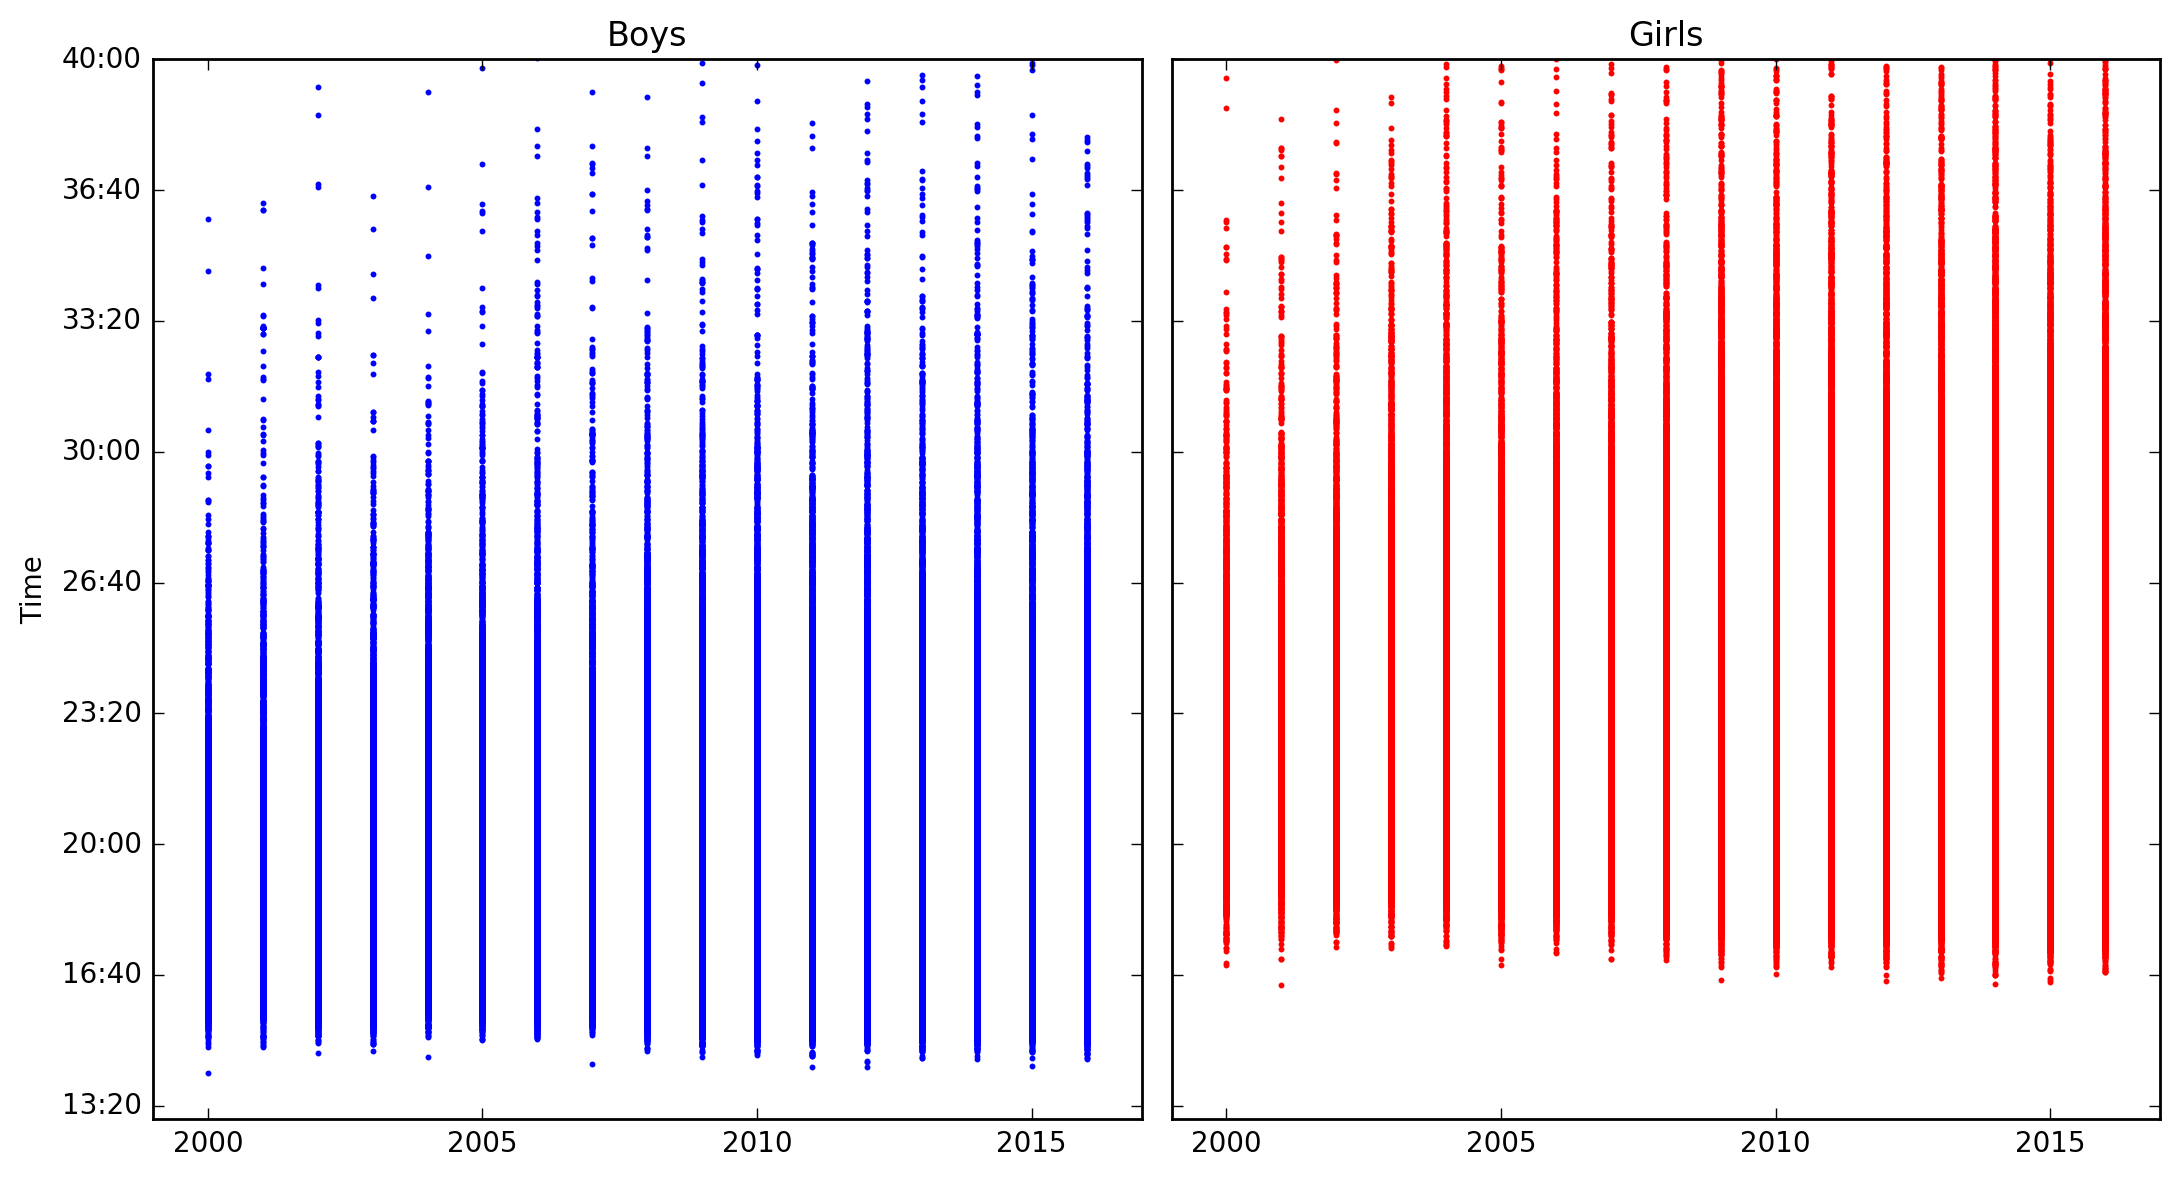

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(11, 6))
ax1.scatter(boys.Year, boys.Time, s = 5, marker = ".", color = 'b')
ax1.set_title('Boys')
ax1.set_xlim([1999, 2017])
ax1.set_ylim([13*60, 2400])
ax1.set_ylabel('Time')
ax2.scatter(girls.Year, girls.Time, s = 5, marker = ".", color = 'r')
ax2.set_title('Girls')
ax2.set_xlim([1999, 2017])
ax1.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

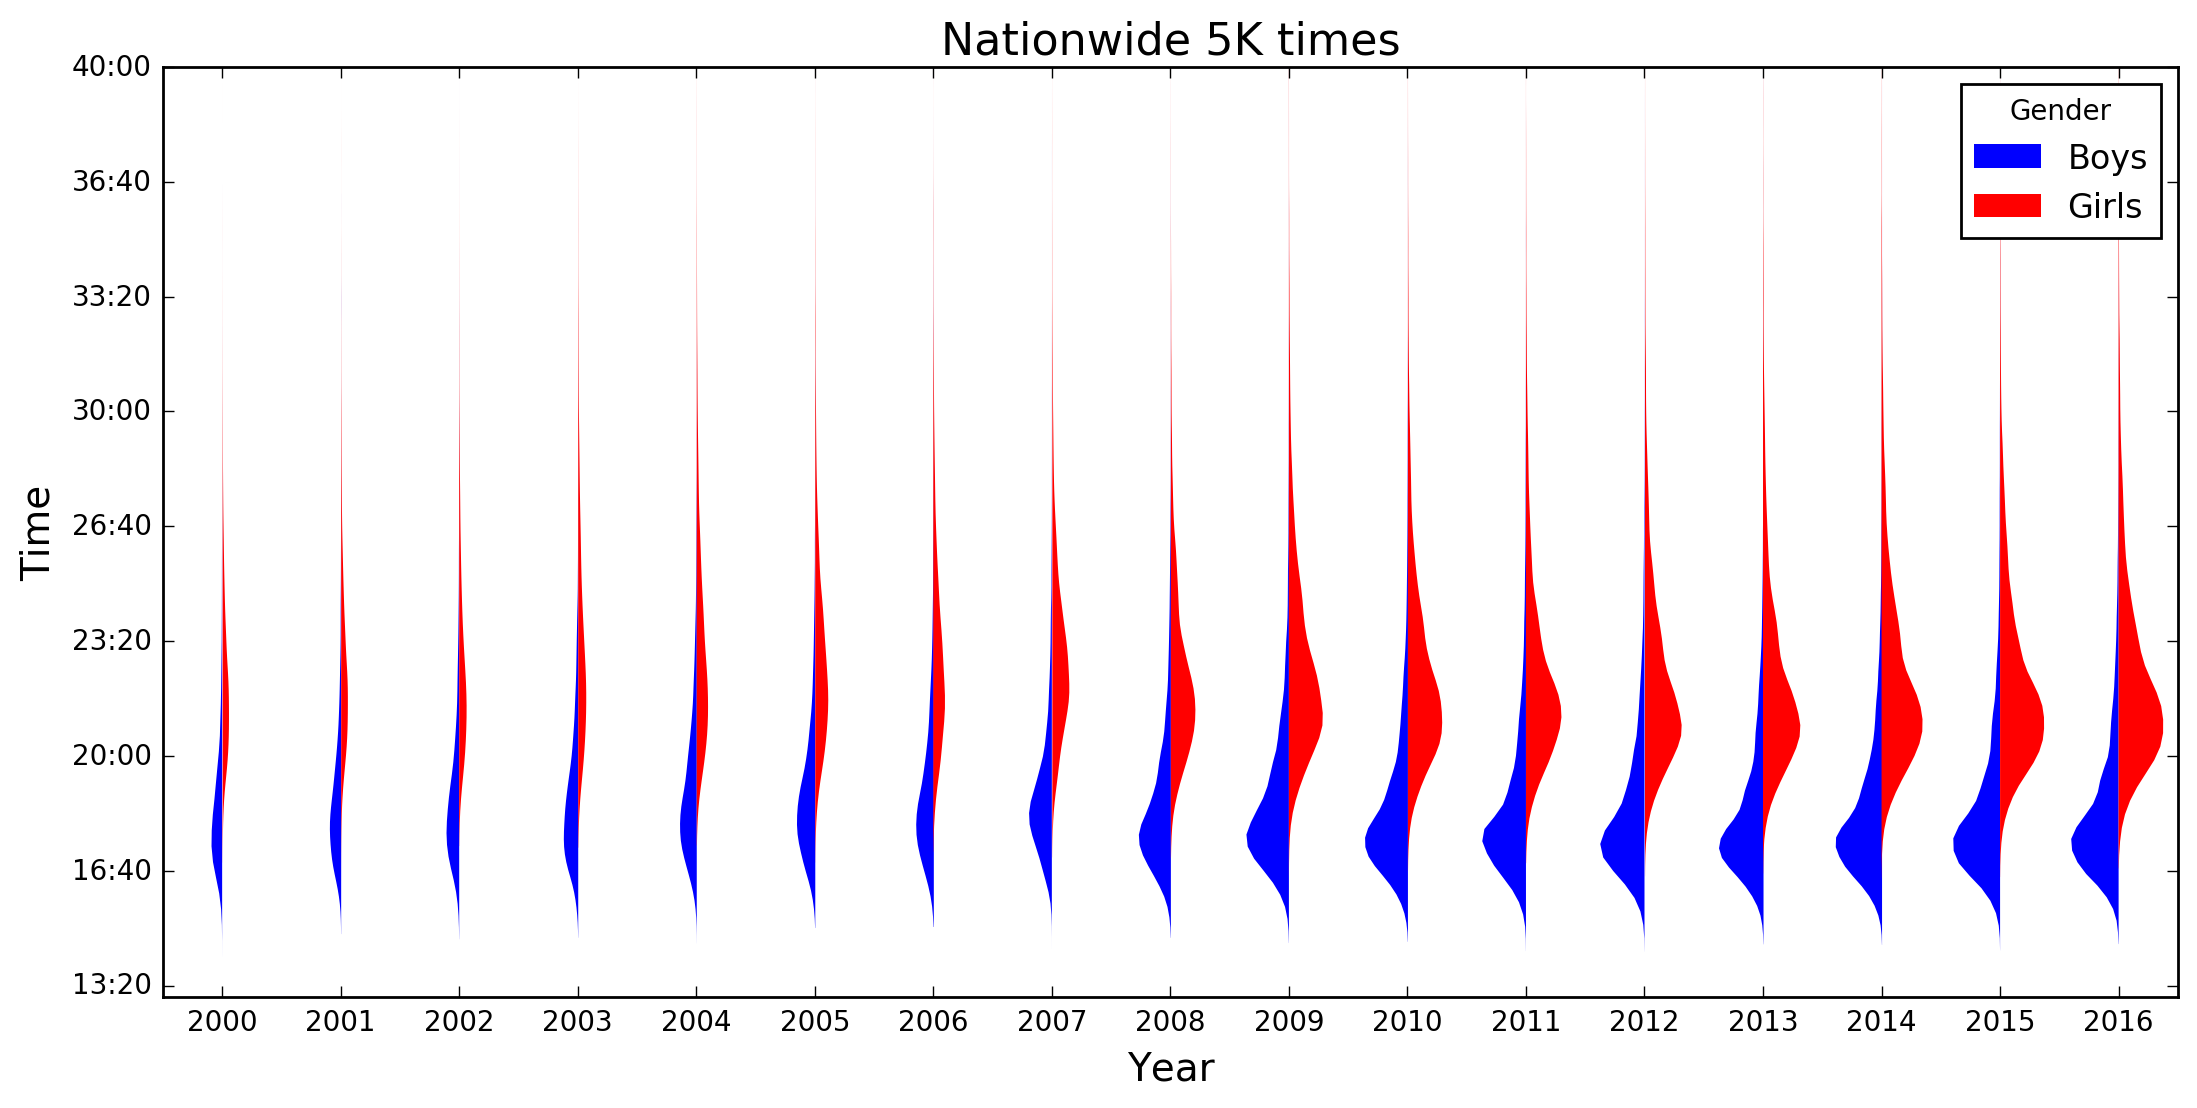

In [31]:
fig, ax = plt.subplots(figsize=(13,6))
sns.violinplot(x=df.Year, y=df.Time, hue = df.Gender, cut = 0, scale = "count", 
               scale_hue = False, inner = None, split = True, palette = {"Boys": "b", "Girls": "r"}, 
               bw = 'silverman', linewidth = 0, saturation = 1)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim([13*60, 2400])
plt.title('Nationwide 5K times', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Time', fontsize = 14)

plt.show()

# Completeness of the milesplit database

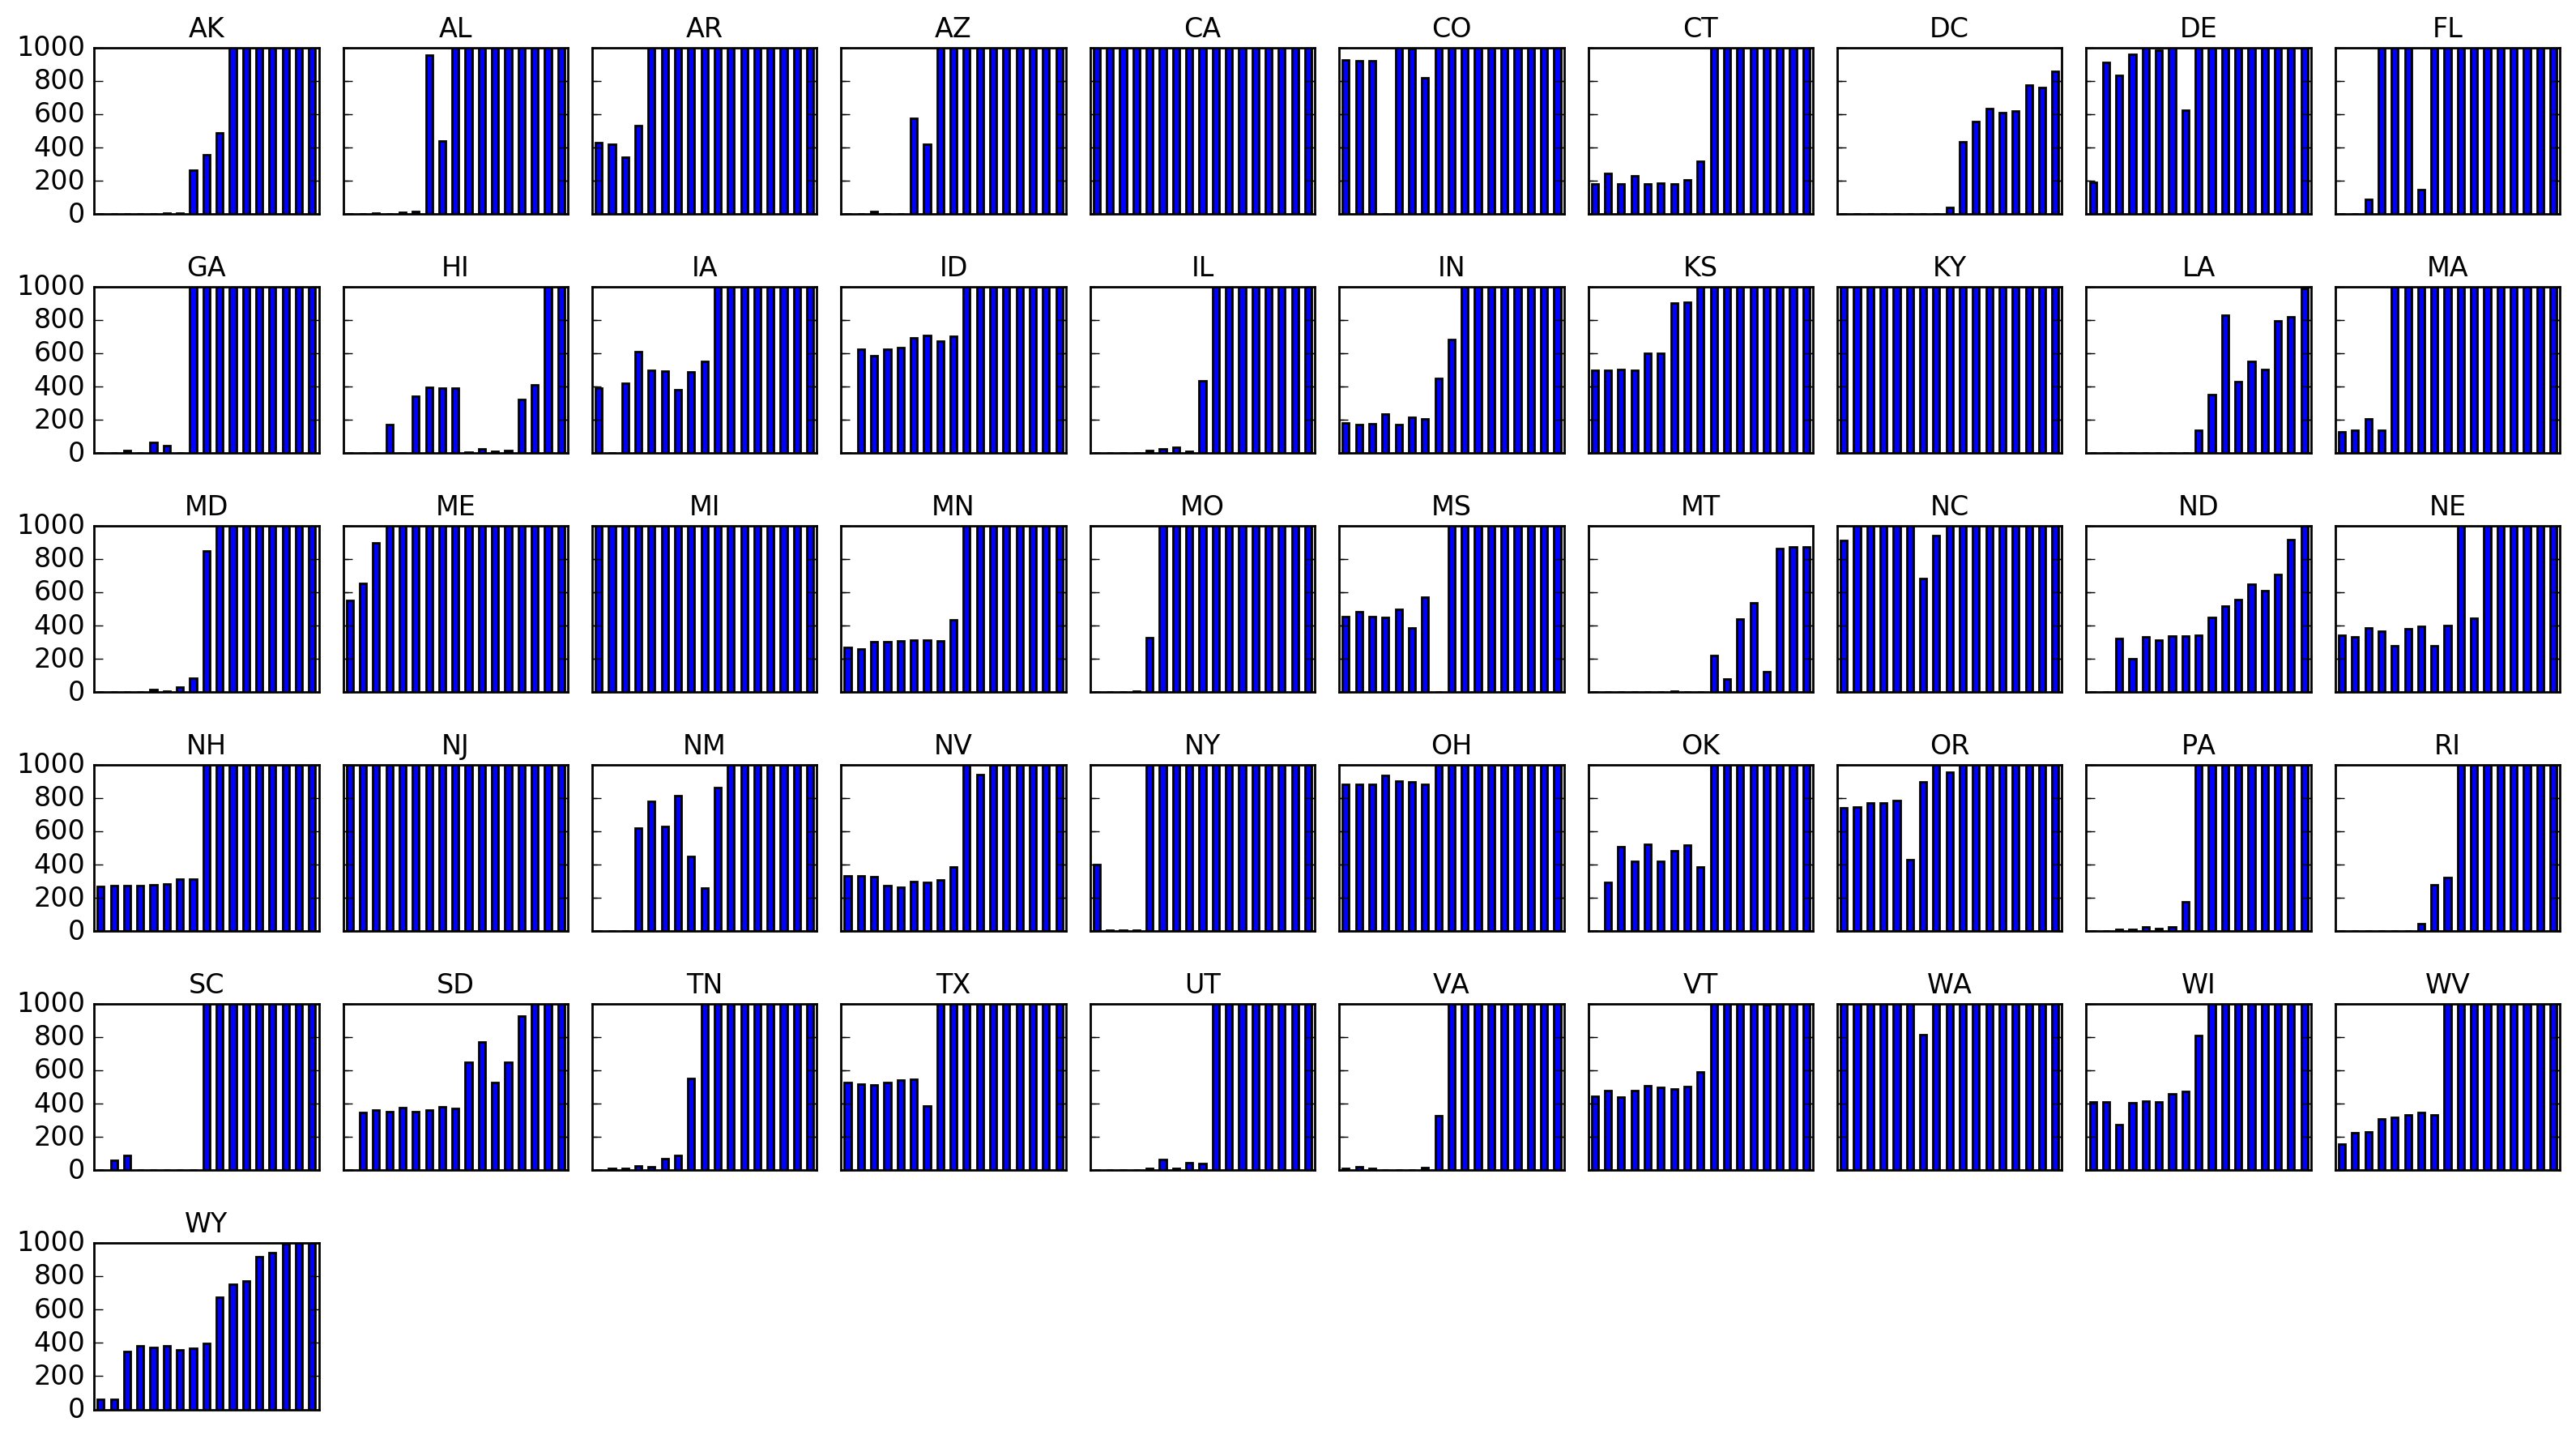

In [45]:
years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)

ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):    
    ind = ind + 1
    ax = plt.subplot(6, 10, ind)
    plt.axis([2000, 2016, 0, 1000])
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    df.Time.groupby([df.State, df.Year]).count().get(key).reindex(index=years).plot.bar(
        title = key, figsize = (16, 9), fontsize = 12, sharey = True, sharex = False) 
    plt.tight_layout()
    plt.xlabel('')
plt.show()

# Other fun stats

In [46]:
## State Record holding Boys (only online records, only dating back to 2000)
boys.sort_values('Time').groupby('State').head(1).sort_index()

Rank   Time                                     Athlete/School  Grade  \
5752       1  903.3                       Mac Macoy  Vestavia Hills HS   2014   
22427      1  883.9                    Levi Thomet  Kodiak High School   2015   
36452      1  867.2                 Bernie Montoya  Cibola High School   2013   
60602      1  903.0            Jacob Shiohira  Bentonville High School   2015   
78805      1  864.0       German Fernandez  Riverbank High School (SJ)   2008   
113327     1  886.5        Cerake Geberkidane  Denver East High School   2014   
136645     1  887.0                   Alex Ostberg  Darien High School   2015   
148550     1  916.5          Mike Crozier  Gonzaga College High School   2012   
163089     1  906.8         Kevin Murray  Charter School of Wilmington   2016   
178506     1  891.0                             Matt Mizereck  Leon HS   2010   
203462     1  881.0         Josh Brickell  Peachtree Ridge High School   2013   
221048     1  922.2                Kaeo Kruse  Kamehameha Schools Oahu   2016   
232316     1  901.0            Elijah Armstrong  Pocatello High School   2015   
247153     1  884.2              Lukas Verzbicas  Sandburg High School   2011   
270612     1  875.0                 Curtis Eckstein  Oldenburg Academy   2017   
281009     1  884.0                 Ellen Ries  North-Linn High School   2005   
304929     1  898.3        Stuart Mcnutt  Blue Valley West High School   2015   
323837     1  883.9             Jacob Thomson  Holy Cross (Louisville)   2013   
345960     1  903.8                     Eric Coston  St. Paul's School   2017   
349865     1  902.0                       Ben True  Greely High School   2004   
380593     1  907.9                     Tyler Spear  Loyola-Blakefield   2014   
399220     1  905.2         John Murray  Shrewsbury Senior High School   2011   
418739     1  850.4                        Dathan Ritzenhein  Rockford   2001   
461397     1  894.1                  Seth Eliason  Hopkins High School   2017   
471601     1  919.2                     Max Holman  Tupelo High School   2010   
488396     1  900.6            Caleb Hoover  College Heights Christian   2011   
508744     1  904.4              Marshall Beatty  Sentinel High School   2017   
520628     1  879.5              Seth Hirsch  Millard West High School   2017   
533020     1  899.7                Henry Weisberg  McQueen High School   2017   
549475     1  903.4          Patrick O'brien  Oyster River High School   2017   
570173     1  858.7               Edward Cheserek  St. Benedict's Prep   2013   
594997     1  894.4           Luis Martinez  Sue Cleveland High School   2013   
617832     1  887.0                     Jeriqho Gadway  Plattsburgh HS   2015   
642538     1  884.0                 Ben Huffman  Providence Day School   2014   
663319     1  896.0                Jake Leingang  Bismarck High School   2013   
678380     1  884.7                    Andrew Jordan  Watkins Memorial   2016   
700649     1  891.0              Ben Barrett  Norman North High School   2015   
715918     1  872.7                              Matthew Maton  Summit   2015   
739802     1  887.0                            Noah Affolder  Carlisle   2017   
755672     1  872.4               David Principe Jr.  La Salle Academy   2017   
766366     1  886.8                        Brent Demarest  Porter Gaud   2014   
787577     1  897.1            Derick Peters  West Central High School   2018   
798976     1  872.2               Brodey Hasty  BrentwoodH High School   2018   
814836     1  874.0                                 Craig Lutz  Marcus   2011   
834704     1  872.5                             Conner Mantz  Sky View   2015   
853024     1  924.2  Tyler Marshall  Champlain Valley Union High Sc...   2017   
867606     1  860.8                      Andrew Hunter  Loudoun Valley   2016   
888984     1  871.7         Tanner Anderson  North Central High School   2015   
908753     1  898.0                    

In [39]:
## State Record holding Girls (only online records, only dating back to 2000)
girls.sort_values('Time').groupby('State').head(1).sort_index()

Rank    Time                                     Athlete/School  \
16438      1  1017.0            Amaris Tyynismaa  Catholic - Montgomery   
28896      1  1000.0         Allie Ostrander  Kenai Central High School   
48880      1  1002.9           Danielle Jones  Desert Vista High School   
68268      1  1054.0                 Maggie Montoya  Rogers High School   
89606      1   984.1              Amber Trotter  Ukiah High School (NC)   
128892     1  1004.0                 Brie Oakley  Grandview High School   
143838     1  1035.8                Hannah Debalsi  Staples High School   
151928     1  1042.0                    Devoe Arnold  St. Albans School   
169272     1  1013.0         Julie Macedo  Charter School of Wilmington   
192393     1  1014.1         Kathryn Fluehr  Community School of Naples   
213533     1  1028.0        Grace Tinkey  First Presbyterian Day School   
222559     1  1091.4                  Lauren Ho  Hawaii Baptist Academy   
243795     1  1034.0              Alexa White  Soda Springs High School   
258691     1  1019.5        Anna Sophia Keller  St. Anthony High School   
276199     1  1012.2                 Anna Rohrer  Mishawaka High School   
292521     1  1017.0              Stephanie Jenks  Linn-Mar High School   
312425     1  1005.7                   Cailie Logue  Girard High School   
340310     1  1013.0                  Gabby Karas  Martha Layne Collins   
346633     1  1068.2                     Malia Cali  St. Thomas Aquinas   
370050     1  1055.3              Abbey Leonardi  Kennebunk High School   
392012     1  1034.0          Abigail Green  Walter Johnson High School   
406269     1  1025.1             Natasha Roetter  Lexington High School   
443585     1  1014.8                          Megan Goethals  Rochester   
466305     1  1020.4                Anna Fenske  Farmington High School   
480058     1  1077.0         Abbey Dixon  West Memphis Christian School   
502991     1  1007.2          Taylor Werner  Ste. Genevieve High School   
510625     1  1042.2                    Annie Hill  Glacier High School   
525254     1  1081.6           Taylor Somers  Millard South High School   
534719     1  1039.0                   Marie Lawrence  Reno High School   
557855     1  1032.5             Jacqueline Gaughan  Exeter High School   
587258     1  1017.0                   Briana Gess  Haddonfield Mem. HS   
606300     1  1049.0          Amanda Mayoral  Sue Cleveland High School   
626312     1  1000.9                            Aisling Cuffe  Cornwall   
656670     1   987.0                      Ryen Frazier  Unattached (NC)   
666973     1  1033.2      Karly Ackley  Grand Forks Central High School   
692094     1  1027.5                   India Johnson  Hilliard Davidson   
704925     1  1031.0                  Alex Davis  Plainview High School   
729630     1  1006.6                                Ella Donaghu  Grant   
748942     1  1032.0                   Aislinn Devlin  Downingtown West   
760194     1  1049.2          Ellie Lawler  South Kingstown High School   
776444     1  1038.0                Logan Morris  Spartanburg Christian   
788579     1  1045.0                  Ramsey Kavan  Yankton High School   
807318     1  1017.4      Rebecca Story  Christian Academy of Knoxville   
827842     1  1000.5                       Devin Clark  Smithson Valley   
842207     1  1020.6                                 Sarah Feeny  Ogden   
858100     1  1068.3  Autumn Eastman  Champlain Valley Union High Sc...   
876766     1   989.0                  Weini Kelati  Heritage (Leesburg)   
899409     1   991.1         Amy-Eloise Neale  Glacier Peak High School   
917677     1  1024.0                   Amelia Paladino  University High   
933419     1  1028.0               Molly Seidel  University Lake School   
948147     1  1051.0              Anna Gibson  Jackson Hole High School   

        Grade                                               Meet  Year State  \
16438    2019       Foot Lo

In [40]:
## quick glance at any given state
boys.groupby('State').get_group('CO').describe().drop('Grade', 1).round()
# girls.groupby('State').get_group('CO').describe().drop('Grade', 1).round()

Rank     Time     Year  Elevation
count  12868.0  12868.0  12868.0    12868.0
mean     438.0   1079.0   2010.0     6800.0
std      280.0     74.0      4.0        0.0
min        1.0    886.0   2000.0     6800.0
25%      201.0   1036.0   2007.0     6800.0
50%      401.0   1074.0   2010.0     6800.0
75%      667.0   1107.0   2013.0     6800.0
max     1000.0   1957.0   2016.0     6800.0

# Nationwide Trends

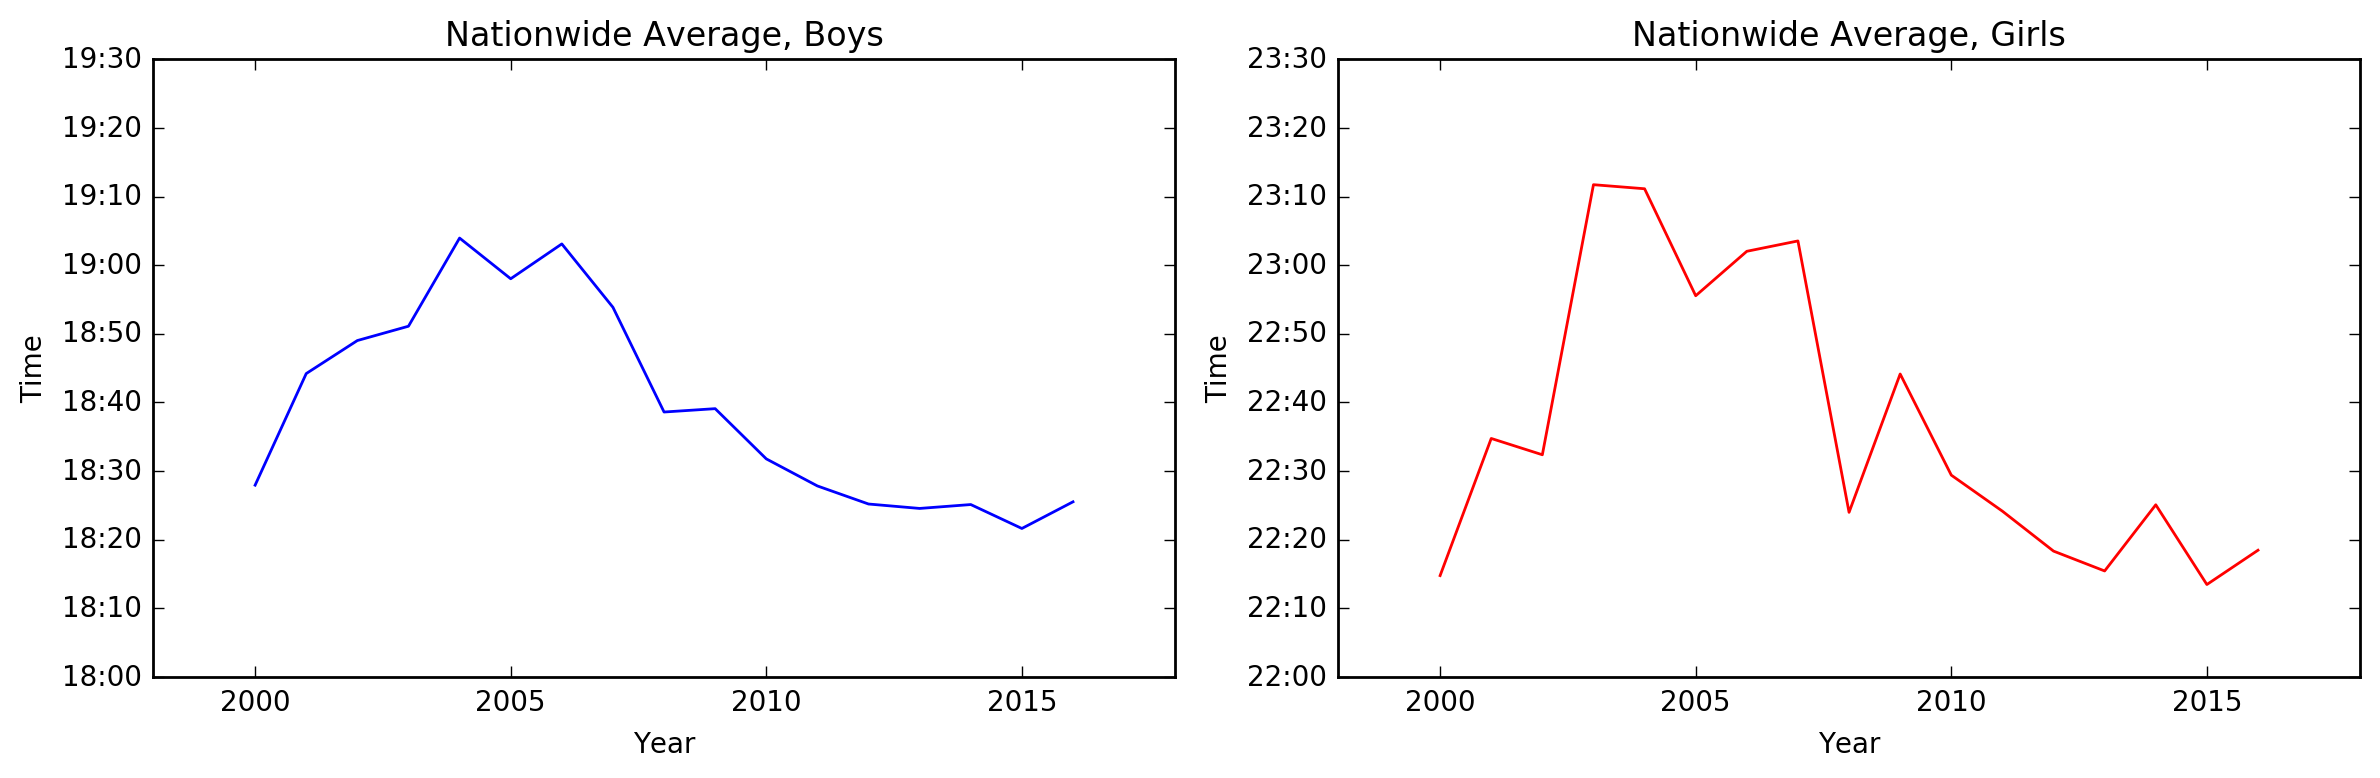

In [47]:
plt.subplot(1,2,1)
boys.Time.groupby(df.Year).mean().plot(color = 'b', figsize=(12,4))
plt.axis([1998, 2018, 18*60, 19.5*60])
plt.ylabel('Time')
plt.title('Nationwide Average, Boys')
ax1 = plt.gca()
ax1.yaxis.set_major_formatter(formatter)

plt.subplot(1,2,2)
girls.Time.groupby(df.Year).mean().plot(color = 'r', figsize=(12,4))
plt.axis([1998, 2018, 22*60, 23.5*60])
plt.ylabel('Time')
plt.title('Nationwide Average, Girls')
ax2 = plt.gca()
ax2.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

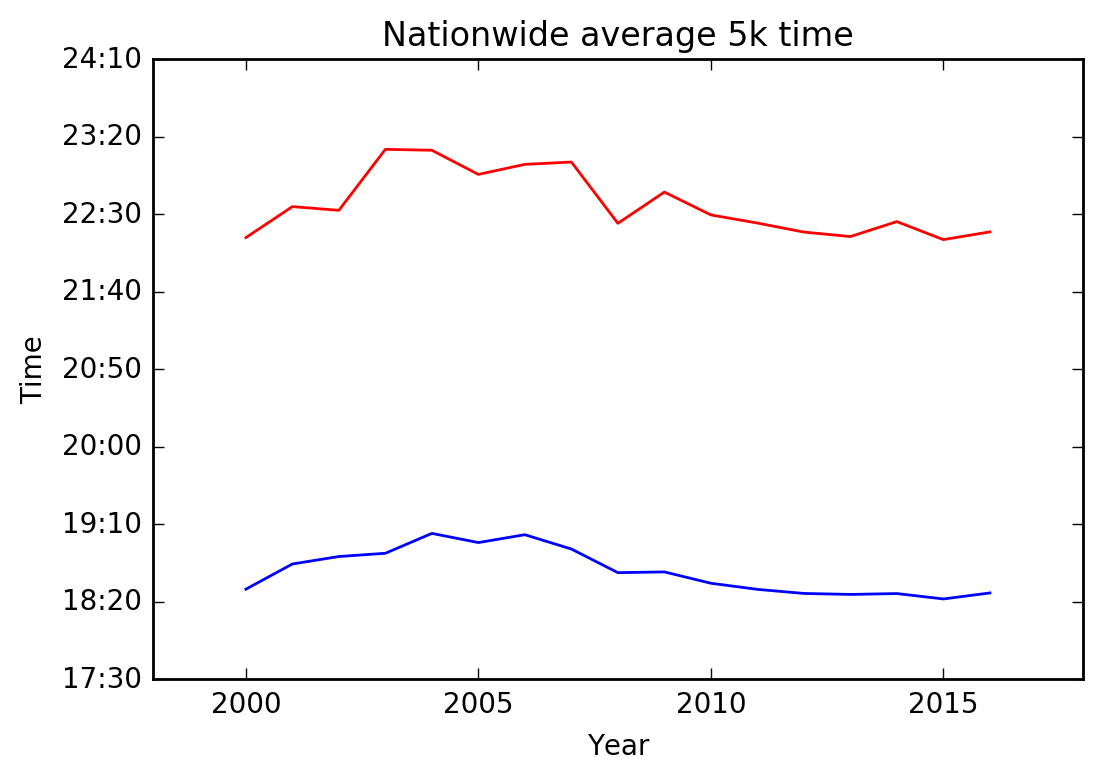

In [43]:
boys.Time.groupby(df.Year).mean().plot(color = 'b')
girls.Time.groupby(df.Year).mean().plot(color = 'r')
plt.axis([1998, 2018, 1050, 1450])
plt.ylabel('Time')
plt.title('Nationwide average 5k time')
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

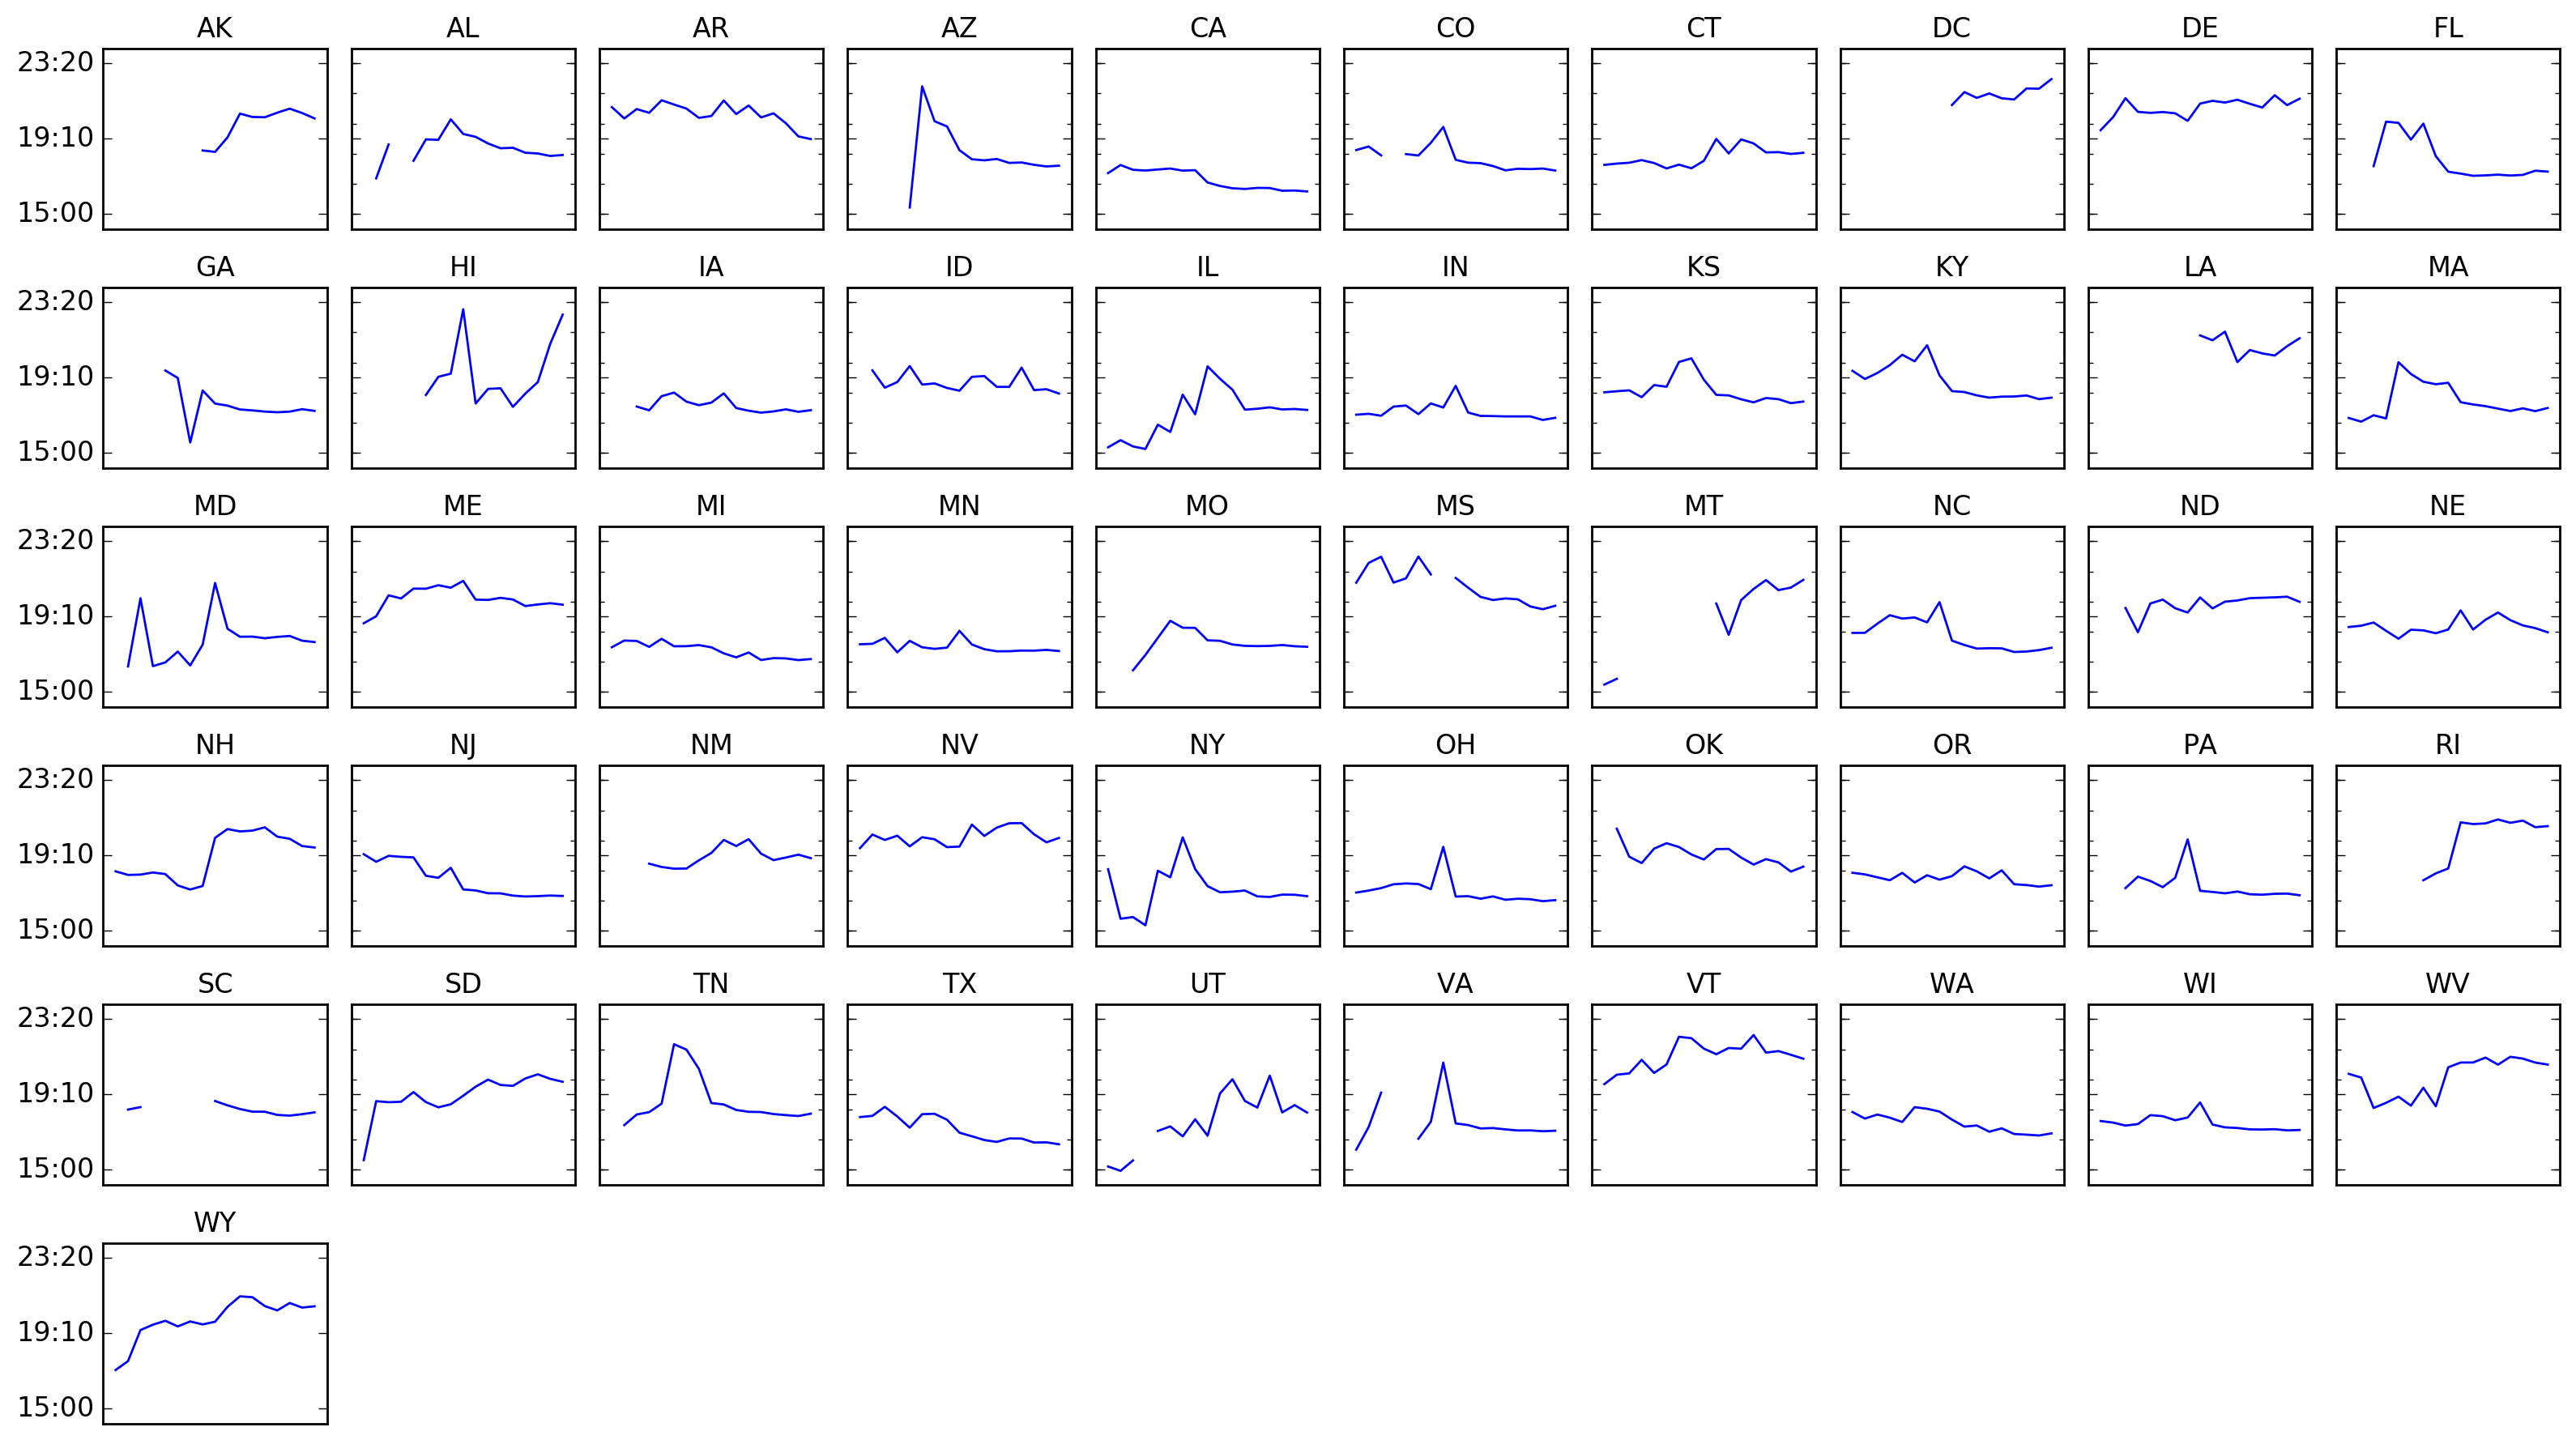

In [53]:
df2 = boys.Time.groupby([df.State, df.Year]).mean()
years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)
ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):
    ind = ind + 1
    plt.subplot(6, 10, ind)
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    df2[key].fillna(0).reindex(index=years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'b', fontsize = 12, sharey = True, sharex = False)
    plt.axis([1999, 2017, 850, 1450])
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)    
    plt.tight_layout()
    plt.xlabel('')
plt.show()

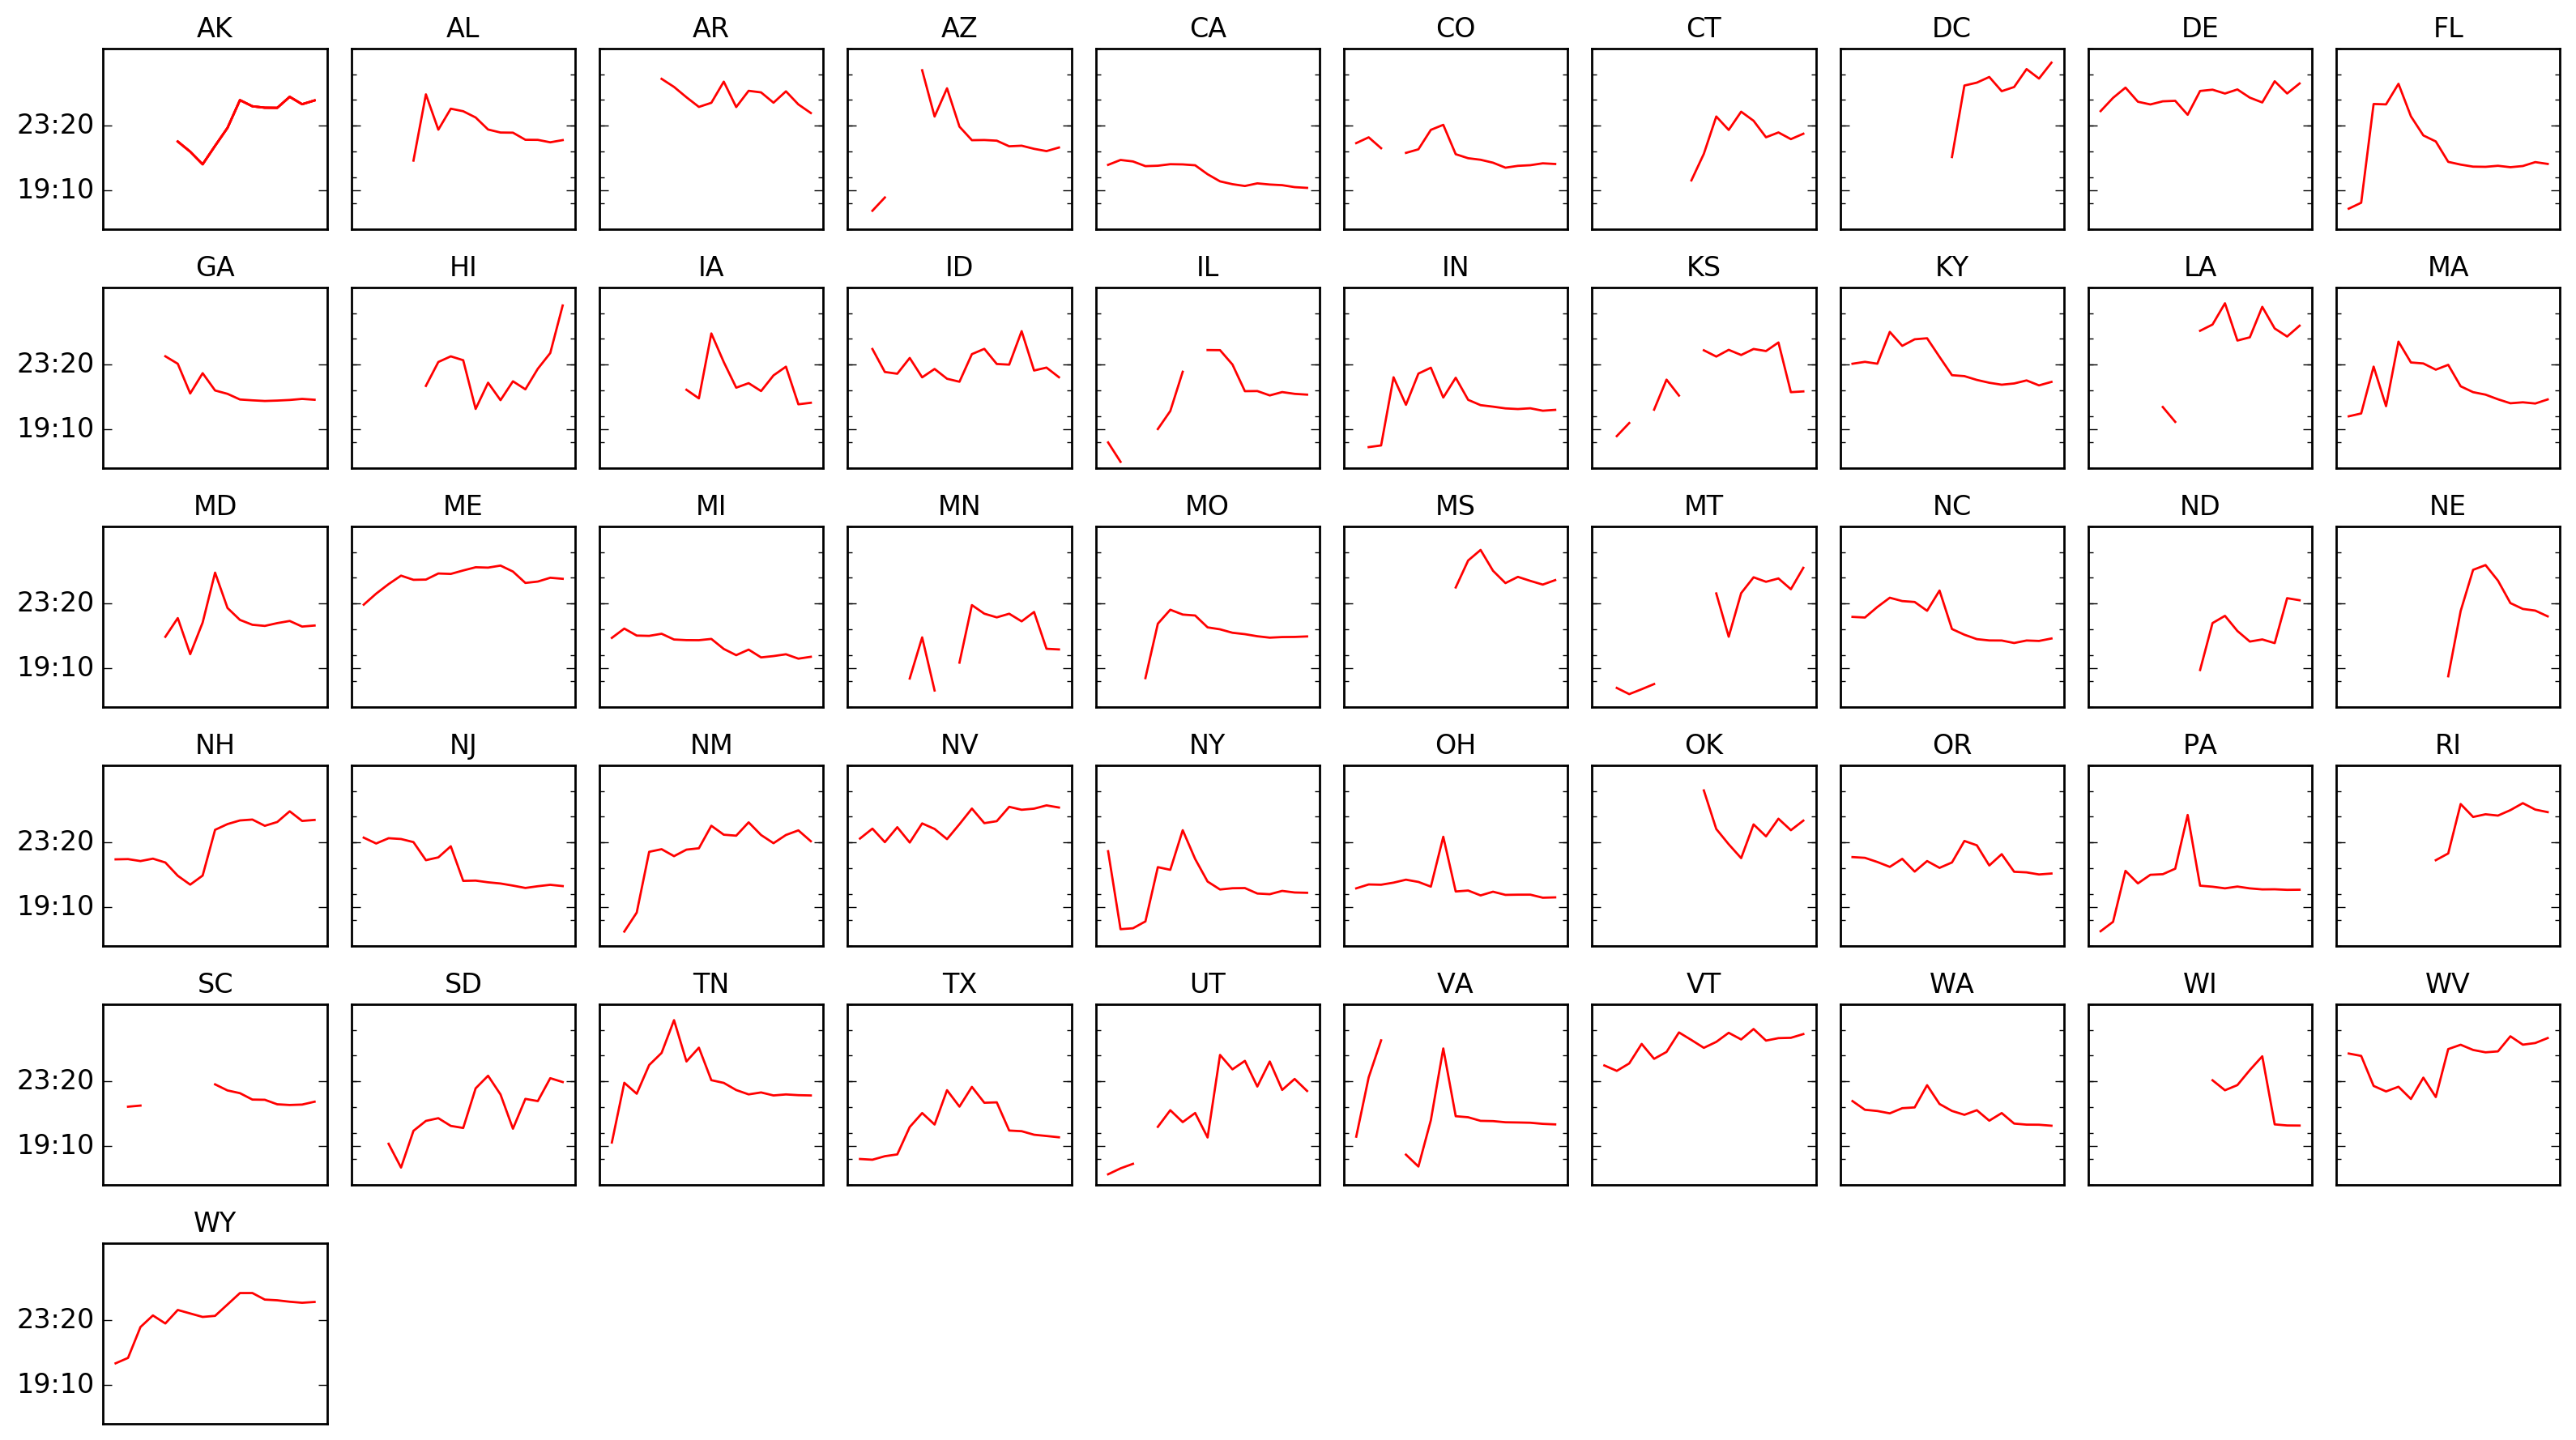

In [46]:
df3 = girls.Time.groupby([df.State, df.Year]).mean()

years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)

ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):    
    ind = ind + 1 
    plt.subplot(6, 10, ind)
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    
    df3[key].fillna(0).reindex(index=years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'r', fontsize = 12, sharey = True, sharex = False)
    
    
    plt.axis([1999, 2017, 1000, 1700])
    
    formatter = mpl.ticker.FuncFormatter(timeTicks)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)
    
    plt.tight_layout()
    plt.xlabel('')
plt.show()

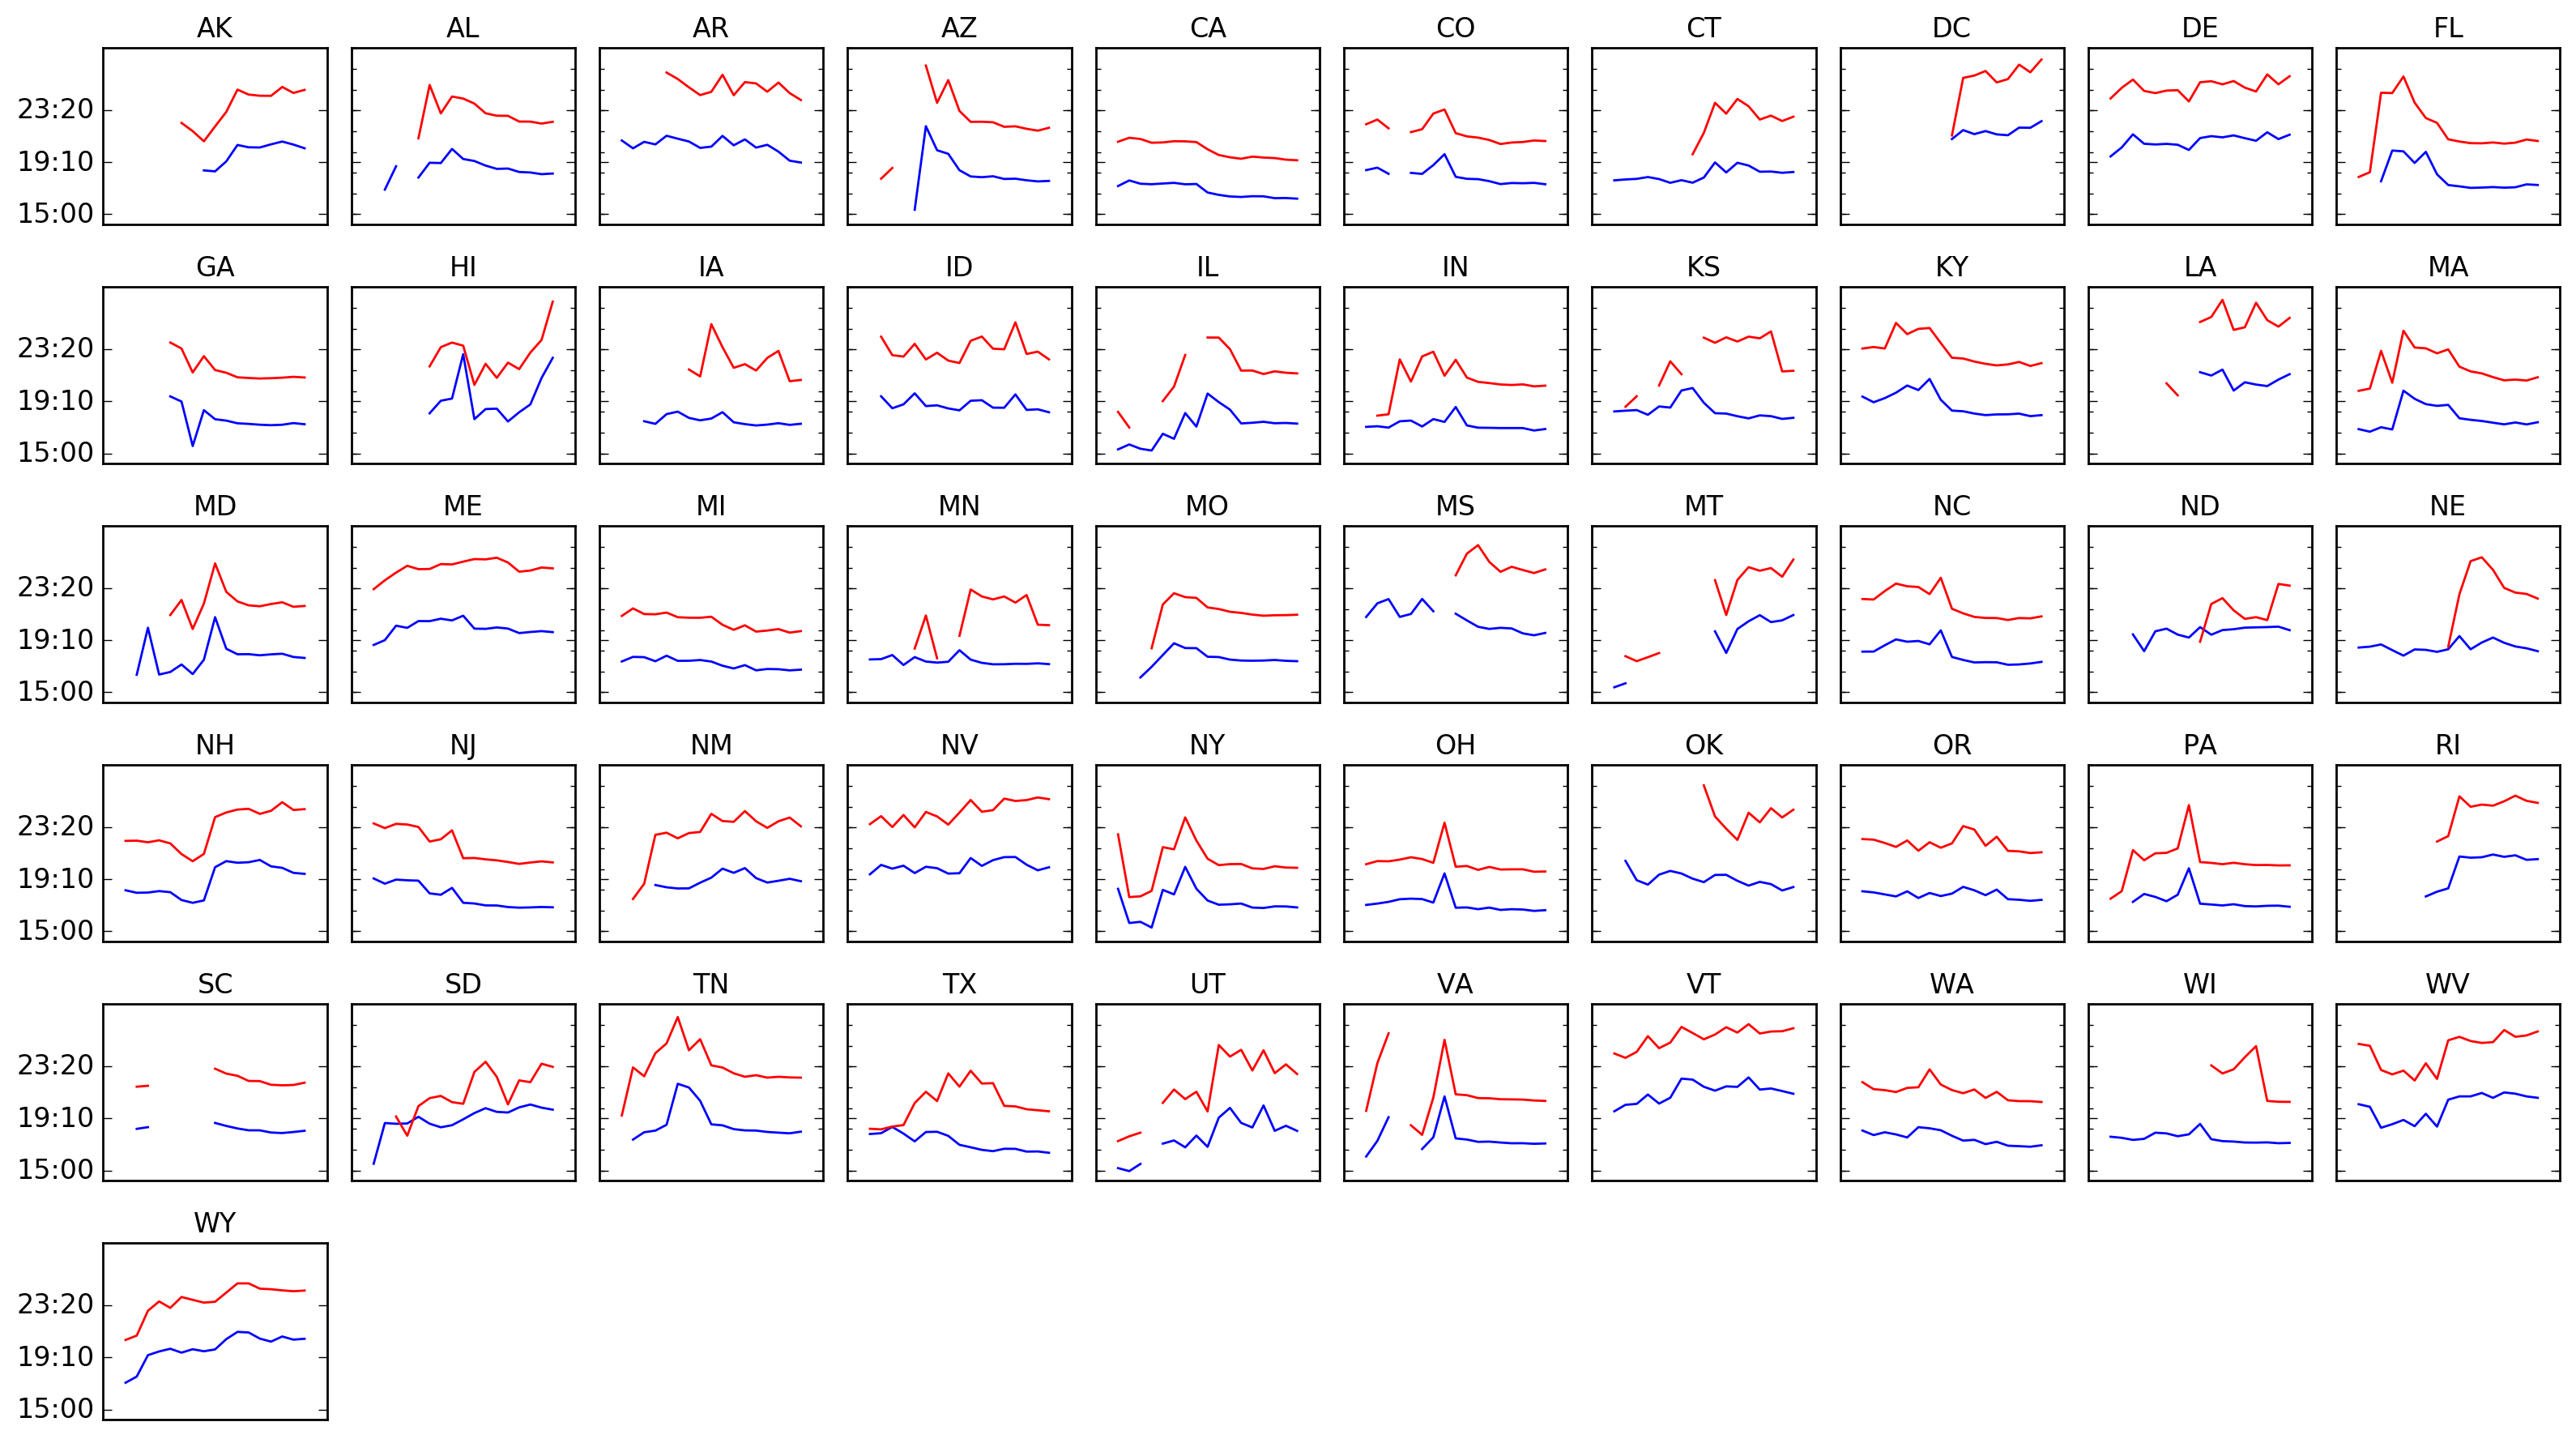

In [55]:
df2 = boys.Time.groupby([df.State, df.Year]).mean()
df3 = girls.Time.groupby([df.State, df.Year]).mean()
years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)
ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):    
    ind = ind + 1 
    plt.subplot(6, 10, ind)
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    df2[key].fillna(0).reindex(index = years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'b', fontsize = 12, sharey = True, sharex = False)
    df3[key].fillna(0).reindex(index = years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'r', fontsize = 12, sharey = True, sharex = False)
    plt.axis([1998, 2018, 850, 1700])
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)    
    plt.tight_layout()
    plt.xlabel('')
plt.show()

In [33]:
for col in dfR.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
       [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# scl = [[0.0, '#edf8e9'],[0.2, '#c7e9c0'],[0.4, '#a1d99b'],
#        [0.6, '#74c476'],[0.8, '#31a354'],[1.0, '#006d2c']]

# df['text'] = df['state'] + '<br>' +\
#     '2000 '+df['2000']+' 2001 '+df['2001']+'<br>'+\
#     '2002 '+df['2002']+' 2003 ' + df['2003']+'<br>'+\
#     '2004 '+df['2004']+' 2005 '+df['2005']

data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dfR['State'],
        z = dfR['Elevation'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                    color = 'rgb(255,255,255)',
                    width = 1)),
            colorbar = dict(
                    title = "Elevation (ft)"))]

layout = dict(
            title = 'US Elevation by State<br>(Hover for detail)',
            geo = dict(
                scope='usa',
                projection=dict(type = 'albers usa'),
                showlakes = False,
                lakecolor = 'rgb(255, 255, 255)'),)

fig = dict(data = data, layout = layout)
py.offline.iplot(fig, filename = 'plotly-elevation')

In [ ]:
year = ['2000','2001','2002','2003','2004','2005','2006','2007',
        '2008','2009','2010','2011','2012','2013','2014','2015','2016']

# year = ['2000']

dfplotly = pd.read_csv('d3usa5kboys.csv')

scl = [[0.0, '#a80000'],[0.25, '#ff3f3f'],[0.5, '#ff7f7f'],
       [0.75, '#ffbfbf'],[1.0, '#ffffff']]

for yr in year:
  
    # df['text'] = df['state'] + '<br>' +\
    #     '2000 '+df['2000']+' 2001 '+df['2001']+'<br>'+\
    #     '2002 '+df['2002']+' 2003 ' + df['2003']+'<br>'+\
    #     '2004 '+df['2004']+' 2005 '+df['2005']

    data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dfplotly['code'],
        z = dfplotly[yr].astype(float),
        zmax = 20.0,
        zmin = -20.0,
        zauto = False,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 1
            ) ),
            colorbar = dict(
            title = "% Difference" 
        ))]

    layout = dict(
        title = 'Percent difference from yearly national average<br>Boys 5K<br><br>'+yr,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showlakes = False))

    fig = dict(data=data, layout=layout)
    py.offline.iplot(fig, filename='choropleth-map_' + yr, image_height = 600, image_width = 900,  image = 'png')
#     py.offline.iplot(fig, filename='choropleth-map_' + yr, image_height = 1200, image_width = 1600)

<center>
<img src="choroplethgif.gif">
<center>

<img src="lastelev.png" align="left" width="50%">
<img src="lastpercent.png" align="right" width="50%">

In [47]:
n=20
f, (ax1, ax2)= plt.subplots(1, 2, sharey = True, figsize=(10, 6))

def f(group):
    sorted_times = sorted(group['Time'].values)[100:200]
    return np.mean(sorted_times)

bx = boys.groupby('State').apply(f)
gx = girls.groupby('State').apply(f)

# bx = boys.sort_values(['Time']).head(n).Time
# by = boys.sort_values(['Time']).head(n).Elevation
by = boys.groupby('State').mean().Elevation.head(51)
# bx = boys.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Time
# by = boys.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Elevation
ax1.scatter(bx, by, marker = "o", color = 'b')
ax1.set_title('Boys')
ax1.set_xlim([800, 1100])
ax1.set_ylim([-1000, 7500])
ax1.set_ylabel('Elevation (feet)')
ax1.set_xlabel('Time (seconds)')

# gx = girls.sort_values(['Time']).head(n).Time
# gy = girls.sort_values(['Time']).head(n).Elevation
gy = girls.groupby('State').mean().Elevation.head(51)
# gx = girls.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Time
# gy = girls.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Elevation
ax2.scatter(gx, gy, marker = "o", color = 'm')
ax2.set_title('Girls')
ax2.set_xlim([1000, 1300])
ax2.set_xlabel('Time (seconds)')

# bz = np.polyfit(bx, by, 1)
# bp = np.poly1d(bz)
# ax1.plot(bx, bp(bx), 'b-')
# print "yb=%.6fx+(%.6f)"%(bz[0],bz[1])

# gz = np.polyfit(gx, gy, 1)
# gp = np.poly1d(gz)
# ax2.plot(gx, gp(gx), 'm-')
# print "yg=%.6fx+(%.6f)"%(gz[0],gz[1])

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Elevation'

In [ ]:
boys.groupby('State').apply(f)

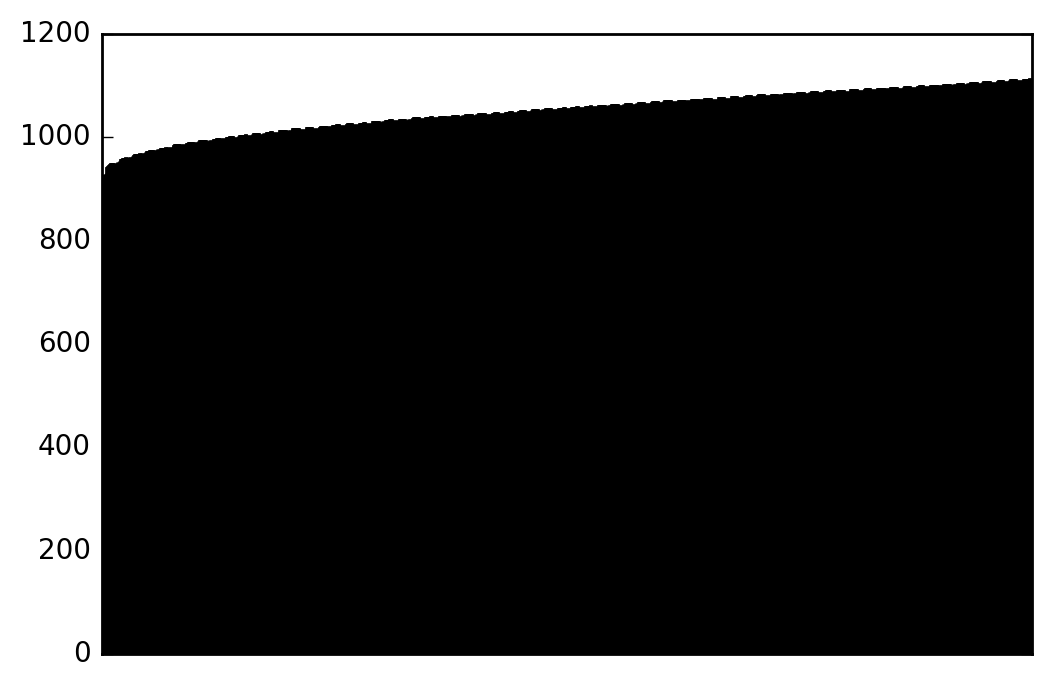

In [38]:
# y = boys.groupby('State').get_group('CO').Time
# x = boys.groupby('State').get_group('CO').Index()
boys.groupby(['State', 'Year']).get_group(('CO', 2013)).Time.plot.bar()
plt.xticks([])
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()

# Closer to home..

<img src="2011data.PNG" width="20%" align="left">
<img src="2016data.PNG" width="80%" align="right">

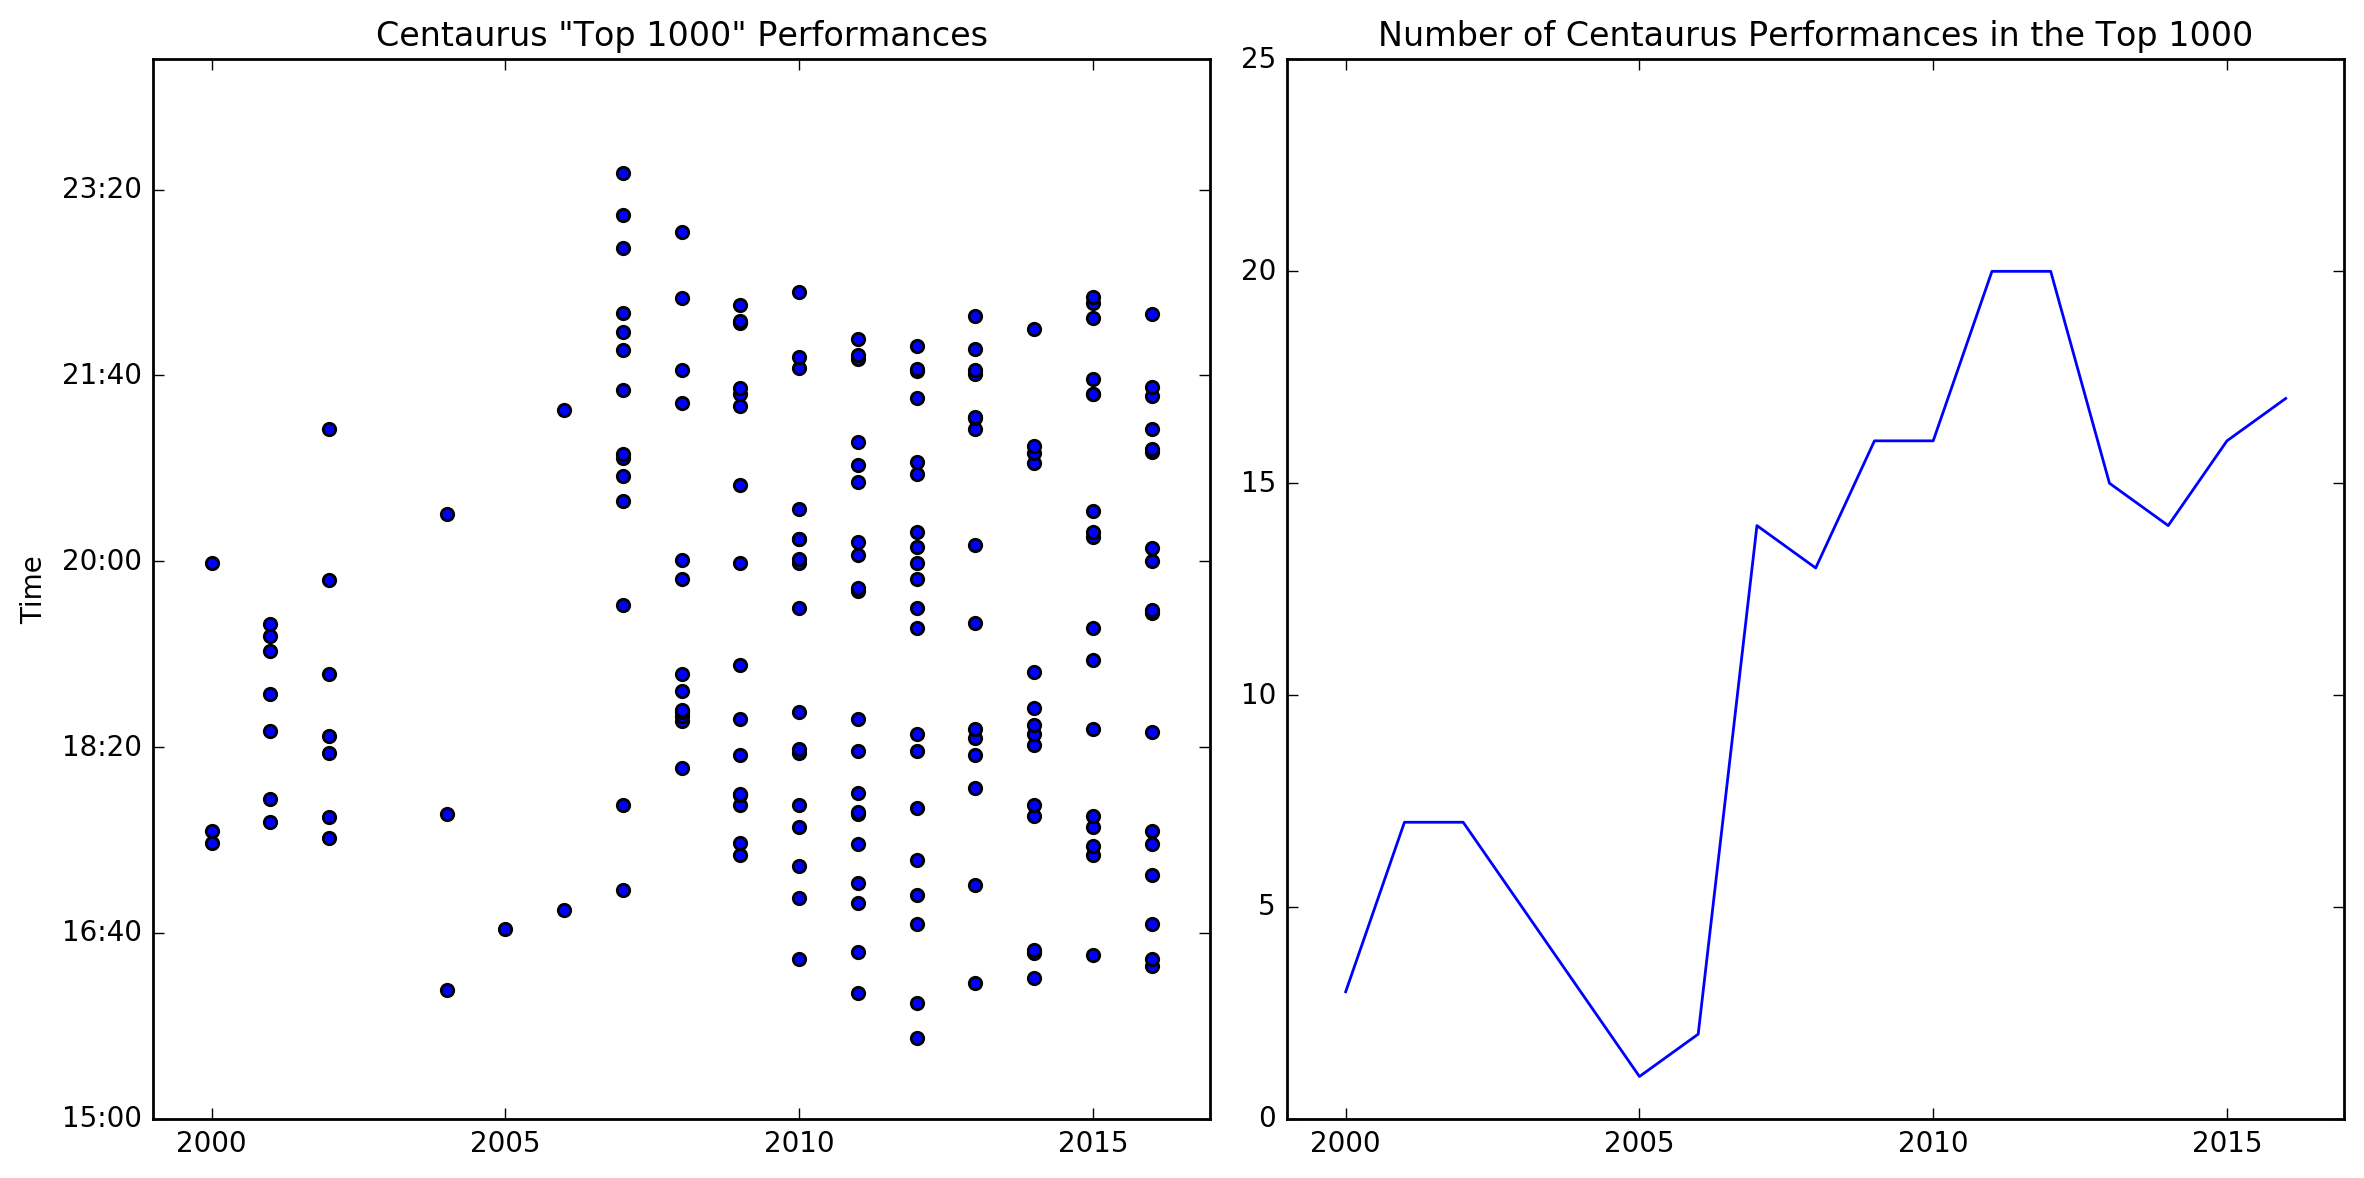

In [70]:
dfCHS = df[df['Athlete/School'].str.contains("Centaurus High School")]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(dfCHS.Year, dfCHS.Time)
ax1.set_title('Centaurus "Top 1000" Performances')
ax1.set_xlim([1999, 2017])
ax1.set_ylim([15*60, 24.5*60])
ax1.set_ylabel('Time')
ax1.yaxis.set_major_formatter(formatter)

ax2.plot(dfCHS.Year.unique(), dfCHS.groupby('Year').Time.nunique())
ax2.set_title('Number of Centaurus Performances in the Top 1000')
ax2.set_xlim([1999, 2017])
ax2.set_ylim([0, 25])

plt.tight_layout()
plt.show()

# To Do
* get "Year = All" records
* Integrate "course difficulty" ratings
* Track
* Determine seconds / ft conversion
* Machine Learning, feature selection..  predict times?

<center>
<img src="wife.png" width="60%">
</center>

## Thanks!

devin.rourke@gmail.com
  
[devinrourke.github.io](https://devinrourke.github.io)
